# **DataCamp.Course_053_Sampling in Python**

### **Course Description**

Sampling in Python is the cornerstone of inference statistics and hypothesis testing. It's a powerful skill used in survey analysis and experimental design to draw conclusions without surveying an entire population. In this Sampling in Python course, you’ll discover when to use sampling and how to perform common types of sampling—from simple random sampling to more complex methods like stratified and cluster sampling. Using real-world datasets, including coffee ratings, Spotify songs, and employee attrition, you’ll learn to estimate population statistics and quantify uncertainty in your estimates by generating sampling distributions and bootstrap distributions.


In [2]:
# read_feather function

import os
import pandas as pd
folder_name = 'datasets'
dir = r'C:\Users\mcaba\OneDrive\Escritorio\Data Science\Datacamp_Notebook\Datacamp_Notebook\{}'.format(folder_name)

def read_feather_fun(folder_name,file_name, path):
    path = dir
    os.chdir(path)
    df = pd.read_feather('{}.feather'.format(file_name))
    return df

coffee_ratings = read_feather_fun('datasets','coffee_ratings_full', dir)
print(coffee_ratings.head(5))

   total_cup_points  species                     owner country_of_origin  \
0             90.58  Arabica                 metad plc          Ethiopia   
1             89.92  Arabica                 metad plc          Ethiopia   
2             89.75  Arabica  grounds for health admin         Guatemala   
3             89.00  Arabica       yidnekachew dabessa          Ethiopia   
4             88.83  Arabica                 metad plc          Ethiopia   

                                  farm_name lot_number       mill ico_number  \
0                                 metad plc       None  metad plc  2014/2015   
1                                 metad plc       None  metad plc  2014/2015   
2  san marcos barrancas "san cristobal cuch       None       None       None   
3     yidnekachew dabessa coffee plantation       None    wolensu       None   
4                                 metad plc       None  metad plc  2014/2015   

                                 company       altitude  ...  

In [3]:
spotify_population = read_feather_fun('datasets','spotify_2000_2020', dir)
print(spotify_population.head(5))

   acousticness          artists  danceability  duration_ms  duration_minutes  \
0       0.97200  ['David Bauer']         0.567     313293.0          5.221550   
1       0.32100   ['Etta James']         0.821     360240.0          6.004000   
2       0.00659    ['Quasimoto']         0.706     202507.0          3.375117   
3       0.00390  ['Millencolin']         0.368     173360.0          2.889333   
4       0.12200   ['Steve Chou']         0.501     344200.0          5.736667   

   energy  explicit                      id  instrumentalness   key  liveness  \
0   0.227       0.0  0w0D8H1ubRerCXHWYJkinO          0.601000  10.0     0.110   
1   0.418       0.0  4JVeqfE2tpi7Pv63LJZtPh          0.000372   9.0     0.222   
2   0.602       1.0  5pxtdhLAi0RTh1gNqhGMNA          0.000138  11.0     0.400   
3   0.977       0.0  3jRsoe4Vkxa4BMYqGHX8L0          0.000000  11.0     0.350   
4   0.511       0.0  4mronxcllhfyhBRqyZi8kU          0.000000   7.0     0.279   

   loudness  mode         

In [4]:
attrition_pop = read_feather_fun('datasets','attrition', dir)
print(attrition_pop.head(5))

   Age  Attrition     BusinessTravel  DailyRate            Department  \
0   21        0.0      Travel_Rarely        391  Research_Development   
1   19        1.0      Travel_Rarely        528                 Sales   
2   18        1.0      Travel_Rarely        230  Research_Development   
3   18        0.0      Travel_Rarely        812                 Sales   
4   18        1.0  Travel_Frequently       1306                 Sales   

   DistanceFromHome      Education EducationField EnvironmentSatisfaction  \
0                15        College  Life_Sciences                    High   
1                22  Below_College      Marketing               Very_High   
2                 3       Bachelor  Life_Sciences                    High   
3                10       Bachelor        Medical               Very_High   
4                 5       Bachelor      Marketing                  Medium   

   Gender  ...  PerformanceRating RelationshipSatisfaction  StockOptionLevel  \
0    Male  ...    

In [153]:
spotify_population = read_feather_fun('datasets','coffee_ratings_full', dir)
print(spotify_population.head(5))

   total_cup_points  species                     owner country_of_origin  \
0             90.58  Arabica                 metad plc          Ethiopia   
1             89.92  Arabica                 metad plc          Ethiopia   
2             89.75  Arabica  grounds for health admin         Guatemala   
3             89.00  Arabica       yidnekachew dabessa          Ethiopia   
4             88.83  Arabica                 metad plc          Ethiopia   

                                  farm_name lot_number       mill ico_number  \
0                                 metad plc       None  metad plc  2014/2015   
1                                 metad plc       None  metad plc  2014/2015   
2  san marcos barrancas "san cristobal cuch       None       None       None   
3     yidnekachew dabessa coffee plantation       None    wolensu       None   
4                                 metad plc       None  metad plc  2014/2015   

                                 company       altitude  ...  

## **Introduction to Sampling (Module 01-053)**

#### **Sampling and point estimates**

1. Sampling households
Cheaper to ask a small number of households
and use statistics to estimate the population
Working with a subset of the whole population
is called sampling
2. Population vs. sample
The population is the complete dataset
Doesn't have to refer to people
Typically, don't know what the whole population is
The sample is the subset of data you calculate on
3. Coffee rating dataset
Each row represents 1 coffee
1338 rows
We'll treat this as the population
4. Points vs. flavor: population
pts_vs_flavor_pop = coffee_ratings[["total_cup_points", "flavor"]]
5. Points vs. flavor: 10 row sample
pts_vs_flavor_samp = pts_vs_flavor_pop.sample(n=10)
6. Python sampling for Series
cup_points_samp = coffee_ratings['total_cup_points'].sample(n=10)
7. Population parameters & point estimates
import numpy as np
np.mean(pts_vs_flavor_pop['total_cup_points'])
np.mean(cup_points_samp)
8. Point estimates with pandas
pts_vs_flavor_pop['flavor'].mean()
pts_vs_flavor_samp['flavor'].mean()

In [5]:
pts_vs_flavor_pop = coffee_ratings[["total_cup_points", "flavor"]]
print(pts_vs_flavor_pop)
pts_vs_flavor_samp = pts_vs_flavor_pop.sample(n=10)
print(pts_vs_flavor_samp)
cup_points_samp = coffee_ratings['total_cup_points'].sample(n=10)
print(cup_points_samp)


      total_cup_points  flavor
0                90.58    8.83
1                89.92    8.67
2                89.75    8.50
3                89.00    8.58
4                88.83    8.50
...                ...     ...
1333             78.75    7.58
1334             78.08    7.67
1335             77.17    7.33
1336             75.08    6.83
1337             73.75    6.67

[1338 rows x 2 columns]
      total_cup_points  flavor
992              81.08    7.75
90               85.08    8.00
1049             80.67    7.08
230              84.17    7.75
328              83.67    7.75
561              82.83    7.58
1235             78.00    7.08
720              82.33    7.50
726              82.33    7.50
1046             80.75    7.33
903     81.58
738     82.25
1158    79.67
26      86.92
1276    75.50
85      85.25
1110    80.17
1003    81.00
922     81.50
80      85.33
Name: total_cup_points, dtype: float64


In [6]:
import numpy as np
display(
    np.mean(pts_vs_flavor_pop['total_cup_points'])
)
display(
    np.mean(cup_points_samp)
)
display(
    pts_vs_flavor_pop['flavor'].mean()
)
display(
    pts_vs_flavor_samp['flavor'].mean()
)

82.15120328849028

81.917

7.526046337817639

7.531999999999999

Simple sampling with pandas
Throughout this chapter, you'll be exploring song data from Spotify. Each row of this population dataset represents a song, and there are over 40,000 rows. Columns include the song name, the artists who performed it, the release year, and attributes of the song like its duration, tempo, and danceability. You'll start by looking at the durations.

Your first task is to sample the Spotify dataset and compare the mean duration of the population with the sample.

spotify_population is available and pandas is loaded as pd.

In [7]:
# Sample 1000 rows from spotify_population
spotify_sample = spotify_population.sample(n=1000)

# Print the sample
print(spotify_sample)

# Calculate the mean duration in mins from spotify_population
mean_dur_pop = spotify_population['duration_minutes'].mean()

# Calculate the mean duration in mins from spotify_sample
mean_dur_samp = spotify_sample['duration_minutes'].mean()

# Print the means
print(mean_dur_pop)
print(mean_dur_samp)


       acousticness                                           artists  \
12512       0.22100       ['A Boogie Wit da Hoodie', 'Summer Walker']   
33394       0.96800                                   ['Fred Mollin']   
25450       0.05150                                 ['Darryl Worley']   
119         0.83000                                 ['Nicole Kidman']   
701         0.00754  ['Ali Tabatabaee', 'Matty Lewis from Zebrahead']   
...             ...                                               ...   
28883       0.04220                             ['Sabrina Carpenter']   
13542       0.45200                                   ['Danny Jacob']   
24834       0.46500                                         ['Bazzi']   
26274       0.92300                              ['Sleeping At Last']   
18868       0.12900                      ['Mariah Carey', 'Mystikal']   

       danceability  duration_ms  duration_minutes  energy  explicit  \
12512         0.579     183703.0          3.061717 

Simple sampling and calculating with NumPy
You can also use numpy to calculate parameters or statistics from a list or pandas Series.

You'll be turning it up to eleven and looking at the loudness property of each song.

spotify_population is available and numpy is loaded as np.

In [8]:
# Create a pandas Series from the loudness column of spotify_population
loudness_pop = spotify_population['loudness']

# Sample 100 values of loudness_pop
loudness_samp = loudness_pop.sample(n=100)

# Calculate the mean of loudness_pop
mean_loudness_pop = np.mean(loudness_pop)

# Calculate the mean of loudness_samp
mean_loudness_samp = np.mean(loudness_samp)

print(mean_loudness_pop)
print(mean_loudness_samp)

-7.366856851353947
-7.339130000000001


#### **Convenience sampling**

1. The Literary Digest election prediction
Prediction: Landon gets 57%; Roosevelt gets 43%
Actual results: Landon got 38%; Roosevelt got 62%
Sample not representative of population, causing sample bias
Collecting data by the easiest method is called convenience sampling
2. Convenience sampling coffee ratings
coffee_ratings["total_cup_points"].mean()
coffee_ratings_first10 = coffee_ratings.head(10)
coffee_ratings_first10["total_cup_points"].mean()
3. Visualizing selection bias
import matplotlib.pyplot as plt
import numpy as np
coffee_ratings["total_cup_points"].hist(bins=np.arange(59, 93, 2))
plt.show()

coffee_ratings_first10["total_cup_points"].hist(bins=np.arange(59, 93, 2))
plt.show()
4. Visualizing selection bias for a random sample
coffee_sample = coffee_ratings.sample(n=10)
coffee_sample["total_cup_points"].hist(bins=np.arange(59, 93, 2))
plt.show()

In [9]:
display(
coffee_ratings["total_cup_points"].mean()
)

display(
coffee_ratings_first10 = coffee_ratings.head(10)
)


coffee_ratings_first10 = coffee_ratings.head(10)
coffee_ratings_first10["total_cup_points"].mean()


82.15120328849028

89.1

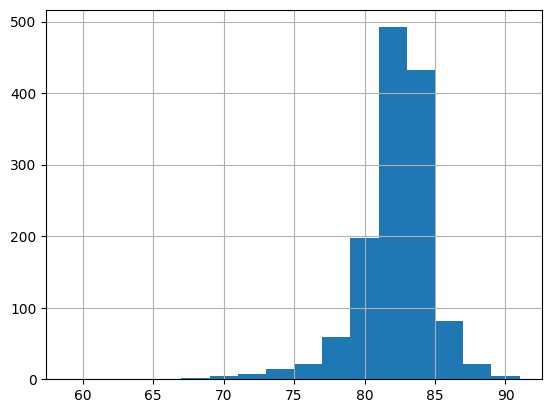

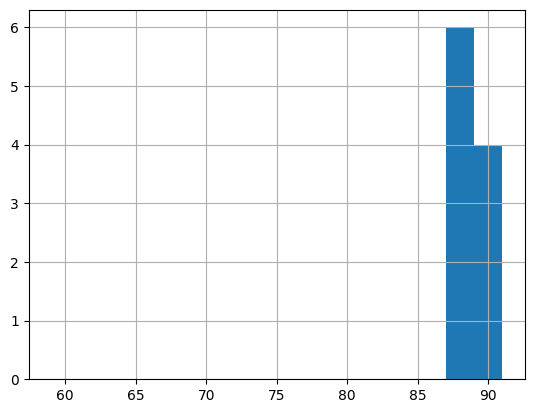

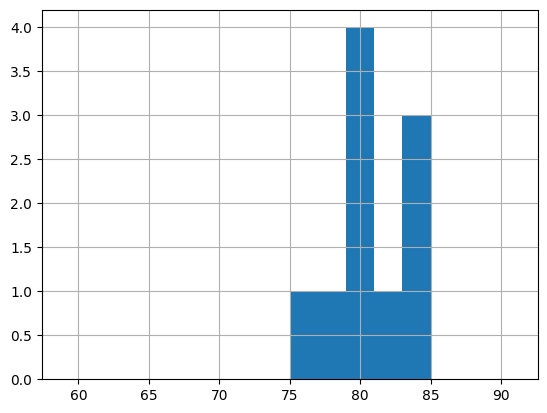

In [10]:
import matplotlib.pyplot as plt
import numpy as np
coffee_ratings["total_cup_points"].hist(bins=np.arange(59, 93, 2))
plt.show()

coffee_ratings_first10["total_cup_points"].hist(bins=np.arange(59, 93, 2))
plt.show()

coffee_sample = coffee_ratings.sample(n=10)
coffee_sample["total_cup_points"].hist(bins=np.arange(59, 93, 2))
plt.show()

Are findings from the sample generalizable?
You just saw how convenience sampling—collecting data using the easiest method—can result in samples that aren't representative of the population. Equivalently, this means findings from the sample are not generalizable to the population. Visualizing the distributions of the population and the sample can help determine whether or not the sample is representative of the population.

The Spotify dataset contains an acousticness column, which is a confidence measure from zero to one of whether the track was made with instruments that aren't plugged in. You'll compare the acousticness distribution of the total population of songs with a sample of those songs.

spotify_population and spotify_mysterious_sample are available; pandas as pd, matplotlib.pyplot as plt, and numpy as np are loaded.

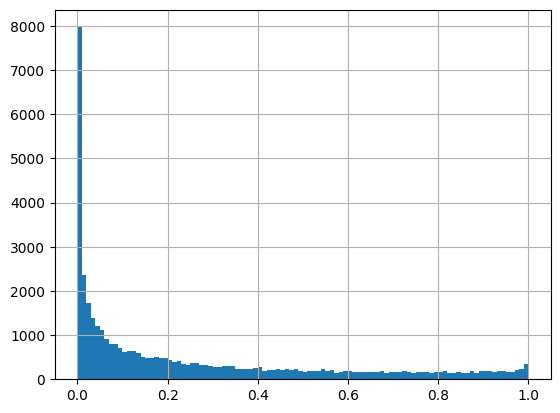

In [11]:
# Visualize the distribution of acousticness with a histogram
spotify_population["acousticness"].hist(bins=np.arange(0, 1.01, 0.01))
plt.show()

Are these findings generalizable?
Let's look at another sample to see if it is representative of the population. This time, you'll look at the duration_minutes column of the Spotify dataset, which contains the length of the song in minutes.

spotify_population and spotify_mysterious_sample2 are available; pandas, matplotlib.pyplot, and numpy are loaded using their standard aliases.

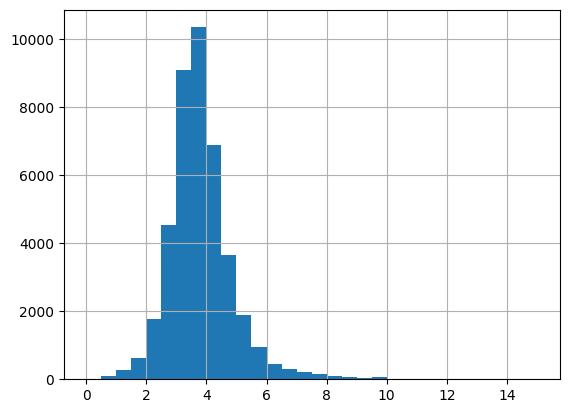

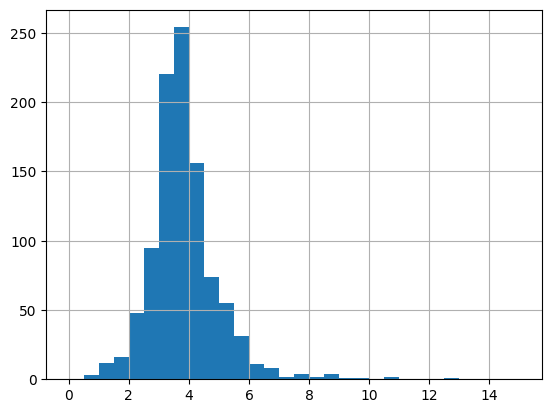

In [12]:
# Visualize the distribution of duration_minutes as a histogram
spotify_population['duration_minutes'].hist(bins=np.arange(0, 15.5, 0.5))
plt.show()

spotify_population_sample = spotify_population.sample(n=1000)
spotify_population_sample['duration_minutes'].hist(bins=np.arange(0, 15.5, 0.5))
plt.show()

#### **Pseudo-random number generation**

1. What does random mean?
{adjective} made, done, happening, or chosen without method or conscious decision.
2. True random numbers
Generated from physical processes, like flipping coins
Hotbits uses radioactive decay
RANDOM.ORG uses atmospheric noise
True randomness is expensive
3. Pseudo-random number generation
Pseudo-random number generation is cheap and fast
Next "random" number calculated from previous "random" number
The first "random" number calculated from a seed
The same seed value yields the same random numbers
4. Pseudo-random number generation example
seed = 1
calc_next_random(seed)
calc_next_random(3)
calc_next_random(2)

5. Random number generating functions
Prepend with numpy.random , such as numpy.random.beta()

function            distribution    
.beta               Beta            
.binomial           Binomial 
.chisquare          Chi-squared 
.exponential        Exponential 
.f                  F 
.gamma              Gamma 
.geometric          Geometric 
.hypergeometric     Hypergeometric
.lognormal          Lognormal
.negative_binomial  Negative binomial
.normal             Normal
.standard_t         t
.uniform            Uniform
.poisson            Poisson

6. Visualizing random numbers
randoms = np.random.beta(a=2, b=2, size=5000)
randoms
plt.hist(randoms, bins=np.arange(0, 1, 0.05))
plt.show()

7. Random numbers seeds
np.random.seed(20000229)
np.random.normal(loc=2, scale=1.5, size=2)
np.random.normal(loc=2, scale=1.5, size=2)

In [13]:
randoms = np.random.beta(a=2, b=2, size=5000)
randoms

array([0.60666895, 0.30597116, 0.70976211, ..., 0.43173308, 0.25218278,
       0.39416965])

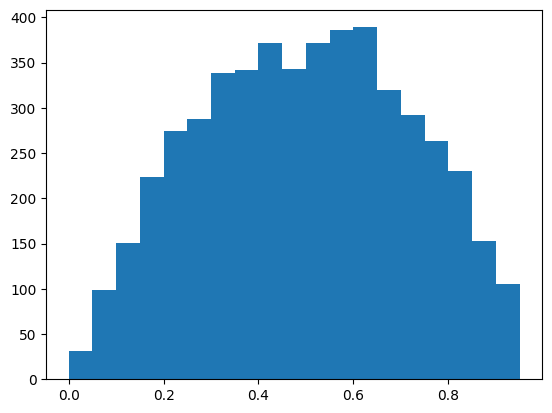

In [14]:
plt.hist(randoms, bins=np.arange(0, 1, 0.05))
plt.show()

In [15]:
np.random.seed(20000229)
display(np.random.normal(loc=2, scale=1.5, size=2))
display(np.random.normal(loc=2, scale=1.5, size=2))

array([-0.59030264,  1.87821258])

array([2.52619561, 4.9684949 ])

In [16]:
np.random.seed(20041004)
display(np.random.normal(loc=2, scale=1.5, size=2))
display(np.random.normal(loc=2, scale=1.5, size=2))

array([1.09364337, 4.55285159])

array([2.67038916, 2.36677492])

Generating random numbers
You've used .sample() to generate pseudo-random numbers from a set of values in a DataFrame. A related task is to generate random numbers that follow a statistical distribution, like the uniform distribution or the normal distribution.

Each random number generation function has distribution-specific arguments and an argument for specifying the number of random numbers to generate.

matplotlib.pyplot is loaded as plt, and numpy is loaded as np.

In [17]:
# Generate random numbers from a Uniform(-3, 3)
uniforms = np.random.uniform (low=-3, high=3, size=5000)

# Print uniforms
print(uniforms)

[1.31207896 2.65406494 0.16554078 ... 0.32216778 1.19004017 1.5796729 ]


In [18]:
# Generate random numbers from a Uniform(-3, 3)
uniforms = np.random.uniform(low=-3, high=3, size=5000)

# Generate random numbers from a Normal(5, 2)
normals = np.random.normal(loc=5, scale=2, size=5000)

# Print normals
print(normals)

[8.77033628 6.84321057 7.47245163 ... 1.48283423 4.66959453 1.66179071]


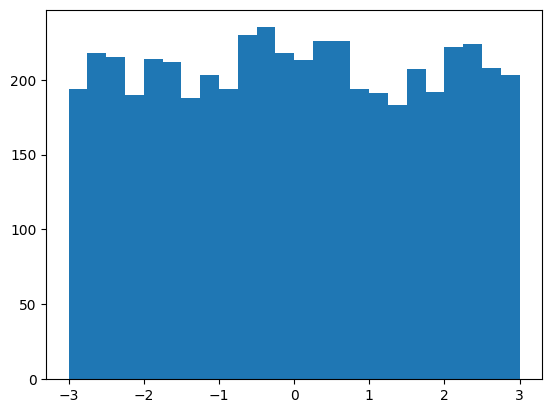

In [19]:
# Generate random numbers from a Uniform(-3, 3)
uniforms = np.random.uniform(low=-3, high=3, size=5000)

# Plot a histogram of uniform values, binwidth 0.25
plt.hist(uniforms, bins=np.arange(-3, 3.25, 0.25))
plt.show()

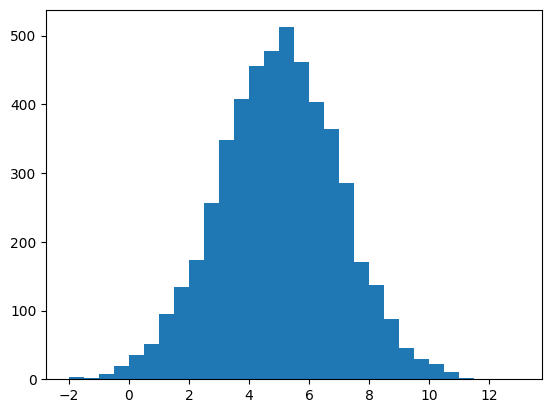

In [20]:
# Generate random numbers from a Normal(5, 2)
normals = np.random.normal(loc=5, scale=2, size=5000)

# Plot a histogram of normal values, binwidth 0.5
plt.hist(normals, bins=np.arange(-2, 13.5, 0.5))
plt.show()

Understanding random seeds
While random numbers are important for many analyses, they create a problem: the results you get can vary slightly. This can cause awkward conversations with your boss when your script for calculating the sales forecast gives different answers each time.

Setting the seed for numpy's random number generator helps avoid such problems by making the random number generation reproducible.

In [21]:
import numpy as np
np.random.seed(123)
x = np.random.normal(size=5)
y = np.random.normal(size=5)
display(print(x))
display(print(y))

[-1.0856306   0.99734545  0.2829785  -1.50629471 -0.57860025]


None

[ 1.65143654 -2.42667924 -0.42891263  1.26593626 -0.8667404 ]


None

In [22]:
import numpy as np
np.random.seed(123)
x = np.random.normal(size=5)
np.random.seed(123)
y = np.random.normal(size=5)
display(print(x))
display(print(y))

[-1.0856306   0.99734545  0.2829785  -1.50629471 -0.57860025]


None

[-1.0856306   0.99734545  0.2829785  -1.50629471 -0.57860025]


None

In [23]:
import numpy as np
np.random.seed(123)
x = np.random.normal(size=5)
np.random.seed(456)
y = np.random.normal(size=5)
display(print(x))
display(print(y))

[-1.0856306   0.99734545  0.2829785  -1.50629471 -0.57860025]


None

[-0.6681285  -0.49820952  0.61857582  0.56869225  1.35050948]


None

## **Sampling Methods (Module 02-053)**

#### **Simple random and systematic sampling**

1. Simple random sampling with pandas
coffee_ratings.sample(n=5, random_state=19000113)

2. Systematic sampling - defining the interval
sample_size = 5
pop_size = len(coffee_ratings)
print(pop_size)
interval = pop_size // sample_size
print(interval)

3. Systematic sampling - selecting the rows //The trouble with systematic sampling

coffee_ratings.iloc[::interval]

coffee_ratings_with_id = coffee_ratings.reset_index()
coffee_ratings_with_id.plot(x="index", y="aftertaste", kind="scatter")
plt.show()

4. Making systematic sampling safe

shuffled = coffee_ratings.sample(frac=1)
shuffled = shuffled.reset_index(drop=True).reset_index()
shuffled.plot(x="index", y="aftertaste", kind="scatter")
plt.show()

In [24]:
display(
coffee_ratings.sample(n=5, random_state=19000113)
)


,total_cup_points,species,owner,country_of_origin,farm_name,lot_number,mill,ico_number,company,altitude,...,color,category_two_defects,expiration,certification_body,certification_address,certification_contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
437,83.25,Arabica,exportadora de cafe condor s.a,Colombia,None,None,trilladora bonanza - armenia quindioa,3-68-0205,None,1600-1800msnm,...,None,0.0,"June 13th, 2012",Almacafé,e493c36c2d076bf273064f7ac23ad562af257a25,70d3c0c26f89e00fdae6fb39ff54f0d2eb1c38ab,m,1600.0,1800.0,1700.0
285,83.83,Arabica,ipanema coffees,Brazil,fazenda rio verde,None,ipanema coffees,002/4177/0121,ipanema coffees,1260,...,Green,0.0,"December 26th, 2014",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,1260.0,1260.0,1260.0
784,82.08,Arabica,cafe politico,Colombia,None,None,None,3-59-1656,cafe politico,None,...,Green,0.0,"September 12th, 2015",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,NaN,NaN,NaN
648,82.58,Arabica,exportadora de cafe condor s.a,Colombia,None,None,trilladora boananza,3-68-0140,exportadora de cafe condor s.a,1750 msnm,...,Green,0.0,"February 27th, 2014",Almacafé,e493c36c2d076bf273064f7ac23ad562af257a25,70d3c0c26f89e00fdae6fb39ff54f0d2eb1c38ab,m,1750.0,1750.0,1750.0
155,84.58,Arabica,exportadora de cafe condor s.a,Colombia,various,None,trilladora boananza,3-68-0005,exportadora de cafe condor s.a,1800 msnm,...,Green,6.0,"October 9th, 2013",Almacafé,e493c36c2d076bf273064f7ac23ad562af257a25,70d3c0c26f89e00fdae6fb39ff54f0d2eb1c38ab,m,1800.0,1800.0,1800.0


In [25]:
sample_size = 5
pop_size = len(coffee_ratings)
print(pop_size)
interval = pop_size // sample_size
print(interval)
coffee_ratings.iloc[::interval]


1338
267


,total_cup_points,species,owner,country_of_origin,farm_name,lot_number,mill,ico_number,company,altitude,...,color,category_two_defects,expiration,certification_body,certification_address,certification_contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
0,90.58,Arabica,metad plc,Ethiopia,metad plc,None,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,0.0,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
267,83.92,Arabica,federacion nacional de cafeteros,Colombia,None,None,None,01-1969,federacion nacional de cafeteros,None,...,None,1.0,"March 11th, 2016",Almacafé,e493c36c2d076bf273064f7ac23ad562af257a25,70d3c0c26f89e00fdae6fb39ff54f0d2eb1c38ab,m,NaN,NaN,NaN
534,82.92,Arabica,consejo salvadoreño del café,El Salvador,santa josefita,1-198,beneficio cuzcachapa,09-030-273,soc. coop. cuzcachapa de r.l.,1350,...,Green,1.0,"August 28th, 2018",Salvadoran Coffee Council,3d4987e3b91399dbb3938b5bdf53893b6ef45be1,27b21e368fb8291cbea02c60623fe6c98f84524d,m,1350.0,1350.0,1350.0
801,82.00,Arabica,"lin, che-hao krude 林哲豪",Taiwan,"you siang coffee farmtainan, taiwan 台灣台南優香咖啡",None,"you siang coffee farmtainan, taiwan 台灣台南優香咖啡",Taiwan,"red on tree co., ltd.",600m,...,Green,0.0,"July 22nd, 2015",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,600.0,600.0,600.0
1068,80.50,Arabica,cqi taiwan icp cqi台灣合作夥伴,Taiwan,王秋金,1,non,None,王秋金,50,...,Blue-Green,0.0,"December 8th, 2018",Blossom Valley International,fc45352eee499d8470cf94c9827922fb745bf815,de73fc9412358b523d3a641501e542f31d2668b0,m,50.0,50.0,50.0
1335,77.17,Robusta,james moore,United States,fazenda cazengo,None,cafe cazengo,None,global opportunity fund,795 meters,...,None,6.0,"December 23rd, 2015",Specialty Coffee Association,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,352d0cf7f3e9be14dad7df644ad65efc27605ae2,m,795.0,795.0,795.0


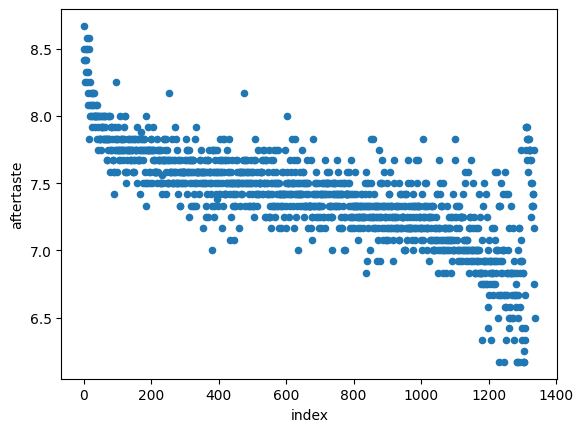

In [26]:
coffee_ratings_with_id = coffee_ratings.reset_index()
coffee_ratings_with_id.plot(x="index", y="aftertaste", kind="scatter")
plt.show()

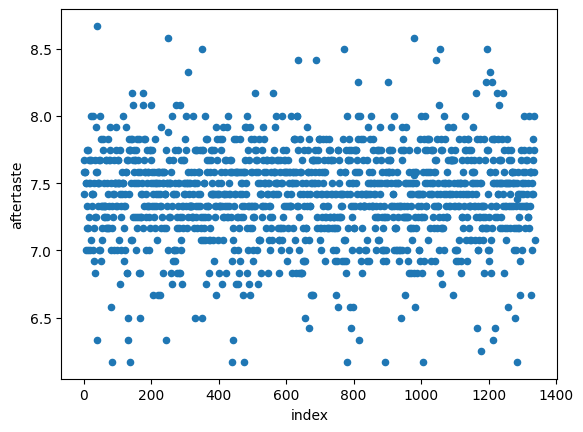

In [27]:
shuffled = coffee_ratings.sample(frac=1)
shuffled = shuffled.reset_index(drop=True).reset_index()
shuffled.plot(x="index", y="aftertaste", kind="scatter")
plt.show()

Simple random sampling
The simplest method of sampling a population is the one you've seen already. It is known as simple random sampling (sometimes abbreviated to "SRS"), and involves picking rows at random, one at a time, where each row has the same chance of being picked as any other.

In this chapter, you'll apply sampling methods to a synthetic (fictional) employee attrition dataset from IBM, where "attrition" in this context means leaving the company.

attrition_pop is available; pandas as pd is loaded.

In [28]:
# Sample 70 rows using simple random sampling and set the seed
attrition_samp = attrition_pop.sample(n=70, random_state=18900217)

# Print the sample
print(attrition_samp)

      Age  Attrition     BusinessTravel  DailyRate            Department  \
1134   35        0.0      Travel_Rarely        583  Research_Development   
1150   52        0.0         Non-Travel        585                 Sales   
531    33        0.0      Travel_Rarely        931  Research_Development   
395    31        0.0      Travel_Rarely       1332  Research_Development   
392    29        0.0      Travel_Rarely        942  Research_Development   
...   ...        ...                ...        ...                   ...   
361    27        0.0  Travel_Frequently       1410                 Sales   
1180   36        0.0      Travel_Rarely        530                 Sales   
230    26        0.0      Travel_Rarely       1443                 Sales   
211    29        0.0  Travel_Frequently        410  Research_Development   
890    30        0.0  Travel_Frequently       1312  Research_Development   

      DistanceFromHome      Education    EducationField  \
1134                25      

Systematic sampling
One sampling method that avoids randomness is called systematic sampling. Here, you pick rows from the population at regular intervals.

For example, if the population dataset had one thousand rows, and you wanted a sample size of five, you could pick rows 0, 200, 400, 600, and 800.

attrition_pop is available; pandas has been pre-loaded as pd.

In [29]:
# Set the sample size to 70
sample_size = 70

# Calculate the population size from attrition_pop
pop_size = len(attrition_pop)
print(pop_size)
# Calculate the interval
interval = pop_size // sample_size
print(interval)

# Systematically sample 70 rows
attrition_sys_samp = attrition_pop.iloc[::interval]

# Print the sample
print(attrition_sys_samp)

1470
21
      Age  Attrition BusinessTravel  DailyRate            Department  \
0      21        0.0  Travel_Rarely        391  Research_Development   
21     19        0.0  Travel_Rarely       1181  Research_Development   
42     45        0.0  Travel_Rarely        252  Research_Development   
63     23        0.0  Travel_Rarely        373  Research_Development   
84     30        1.0  Travel_Rarely        945                 Sales   
...   ...        ...            ...        ...                   ...   
1365   48        0.0  Travel_Rarely        715  Research_Development   
1386   48        0.0  Travel_Rarely       1355  Research_Development   
1407   50        0.0  Travel_Rarely        989  Research_Development   
1428   50        0.0     Non-Travel        881  Research_Development   
1449   52        0.0  Travel_Rarely        699  Research_Development   

      DistanceFromHome      Education EducationField EnvironmentSatisfaction  \
0                   15        College  Life_Sci

Is systematic sampling OK?
Systematic sampling has a problem: if the data has been sorted, or there is some sort of pattern or meaning behind the row order, then the resulting sample may not be representative of the whole population. The problem can be solved by shuffling the rows, but then systematic sampling is equivalent to simple random sampling.

Here you'll look at how to determine whether or not there is a problem.

attrition_pop is available; pandas is loaded as pd, and matplotlib.pyplot as plt.

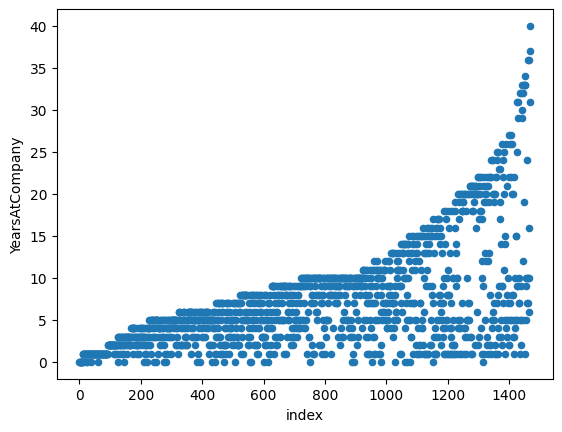

In [30]:
# Add an index column to attrition_pop
attrition_pop_id = attrition_pop.reset_index()

# Plot YearsAtCompany vs. index for attrition_pop_id
attrition_pop_id.plot(x="index", y="YearsAtCompany", kind="scatter")
plt.show()

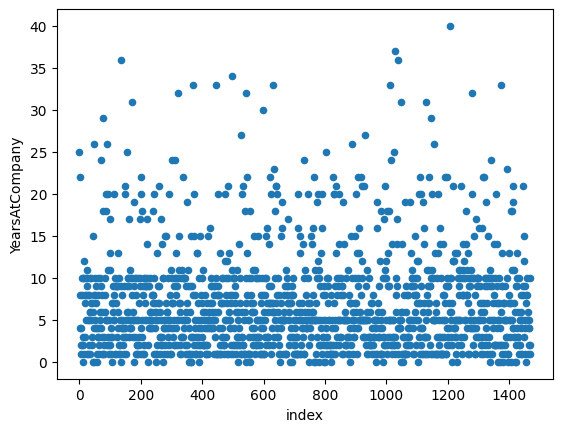

In [31]:
# Shuffle the rows of attrition_pop
attrition_shuffled = attrition_pop.sample(frac=1)

# Reset the row indexes and create an index column
attrition_shuffled = attrition_shuffled.reset_index(drop=True).reset_index()

# Plot YearsAtCompany vs. index for attrition_shuffled
attrition_shuffled.plot(x="index", y="YearsAtCompany", kind="scatter")
plt.show()

#### **Stratified and weighted random sampling**

1. Coffees by country
top_counts = coffee_ratings['country_of_origin'].value_counts()
top_counts.head(6)
2. Filtering for 6 countries
top_counted_countries = ["Mexico", "Colombia", "Guatemala",
"Brazil", "Taiwan", "United States (Hawaii)"]
top_counted_subset = coffee_ratings['country_of_origin'].isin(top_counted_countries)
coffee_ratings_top = coffee_ratings[top_counted_subset]
3. Counts of a simple random sample
coffee_ratings_samp = coffee_ratings_top.sample(frac=0.1, random_state=2021)
coffee_ratings_samp['country_of_origin'].value_counts(normalize=True)

4. Proportional stratified sampling
coffee_ratings_strat = coffee_ratings_top.groupby("country_of_origin")\
.sample(frac=0.1, random_state=2021)

coffee_ratings_strat['country_of_origin'].value_counts(normalize=True)
5. Equal counts stratified sampling
coffee_ratings_eq = coffee_ratings_top.groupby("country_of_origin")\
.sample(n=15, random_state=2021)

coffee_ratings_eq['country_of_origin'].value_counts(normalize=True)

6. Weighted random sampling
import numpy as np
coffee_ratings_weight = coffee_ratings_top
condition = coffee_ratings_weight['country_of_origin'] == "Taiwan"

coffee_ratings_weight['weight'] = np.where(condition, 2, 1)

coffee_ratings_weight = coffee_ratings_weight.sample(frac=0.1, weights="weight")
coffee_ratings_weight['country_of_origin'].value_counts(normalize=True)

In [32]:
top_counts = coffee_ratings['country_of_origin'].value_counts()
top_counts.head(6)

Mexico                    236
Colombia                  183
Guatemala                 181
Brazil                    132
Taiwan                     75
United States (Hawaii)     73
Name: country_of_origin, dtype: int64

In [33]:
top_counted_countries = ["Mexico", "Colombia", "Guatemala",
"Brazil", "Taiwan", "United States (Hawaii)"]
top_counted_subset = coffee_ratings['country_of_origin'].isin(top_counted_countries)
coffee_ratings_top = coffee_ratings[top_counted_subset]

coffee_ratings_samp = coffee_ratings_top.sample(frac=0.1, random_state=2021)
coffee_ratings_samp['country_of_origin'].value_counts(normalize=True)

Mexico                    0.250000
Guatemala                 0.204545
Colombia                  0.181818
Brazil                    0.181818
United States (Hawaii)    0.102273
Taiwan                    0.079545
Name: country_of_origin, dtype: float64

In [34]:
coffee_ratings_strat = coffee_ratings_top.groupby("country_of_origin")\
.sample(frac=0.1, random_state=2021)

coffee_ratings_strat['country_of_origin'].value_counts(normalize=True)


Mexico                    0.272727
Colombia                  0.204545
Guatemala                 0.204545
Brazil                    0.147727
Taiwan                    0.090909
United States (Hawaii)    0.079545
Name: country_of_origin, dtype: float64

In [35]:
coffee_ratings_eq = coffee_ratings_top.groupby("country_of_origin")\
.sample(n=15, random_state=2021)

coffee_ratings_eq['country_of_origin'].value_counts(normalize=True)


Brazil                    0.166667
Colombia                  0.166667
Guatemala                 0.166667
Mexico                    0.166667
Taiwan                    0.166667
United States (Hawaii)    0.166667
Name: country_of_origin, dtype: float64

In [36]:
import numpy as np
coffee_ratings_weight = coffee_ratings_top
condition = coffee_ratings_weight['country_of_origin'] == "Taiwan"

coffee_ratings_weight['weight'] = np.where(condition, 2, 1)

coffee_ratings_weight = coffee_ratings_weight.sample(frac=0.1, weights="weight")
coffee_ratings_weight['country_of_origin'].value_counts(normalize=True)

C:\Users\mcaba\AppData\Local\Temp\ipykernel_7900\2890812173.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coffee_ratings_weight['weight'] = np.where(condition, 2, 1)


Mexico                    0.306818
Taiwan                    0.193182
Brazil                    0.147727
Colombia                  0.136364
Guatemala                 0.136364
United States (Hawaii)    0.079545
Name: country_of_origin, dtype: float64

Proportional stratified sampling
If you are interested in subgroups within the population, then you may need to carefully control the counts of each subgroup within the population. Proportional stratified sampling results in subgroup sizes within the sample that are representative of the subgroup sizes within the population. It is equivalent to performing a simple random sample on each subgroup.

attrition_pop is available; pandas is loaded with its usual alias.

In [37]:
# Proportion of employees by Education level
education_counts_pop = attrition_pop['Education'].value_counts(normalize=True)

# Print education_counts_pop
print(education_counts_pop)

# Proportional stratified sampling for 40% of each Education group
attrition_strat = attrition_pop.groupby("Education")\
.sample(frac=0.4, random_state=2022)


# Print the sample
print(attrition_strat)



Bachelor         0.389116
Master           0.270748
College          0.191837
Below_College    0.115646
Doctor           0.032653
Name: Education, dtype: float64
      Age  Attrition     BusinessTravel  DailyRate            Department  \
1191   53        0.0      Travel_Rarely        238                 Sales   
407    29        0.0  Travel_Frequently        995  Research_Development   
1233   59        0.0  Travel_Frequently       1225                 Sales   
366    37        0.0      Travel_Rarely        571  Research_Development   
702    31        0.0  Travel_Frequently        163  Research_Development   
...   ...        ...                ...        ...                   ...   
733    38        0.0  Travel_Frequently        653  Research_Development   
1061   44        0.0  Travel_Frequently        602       Human_Resources   
1307   41        0.0      Travel_Rarely       1276                 Sales   
1060   33        0.0      Travel_Rarely        516  Research_Development   
17

In [38]:
# Calculate the Education level proportions from attrition_strat
education_counts_strat = attrition_strat['Education'].value_counts(normalize=True)

# Print education_counts_strat
print(education_counts_strat)


Bachelor         0.389456
Master           0.270408
College          0.192177
Below_College    0.115646
Doctor           0.032313
Name: Education, dtype: float64


Equal counts stratified sampling
If one subgroup is larger than another subgroup in the population, but you don't want to reflect that difference in your analysis, then you can use equal counts stratified sampling to generate samples where each subgroup has the same amount of data. For example, if you are analyzing blood types, O is the most common blood type worldwide, but you may wish to have equal amounts of O, A, B, and AB in your sample.

attrition_pop is available; pandas is loaded with its usual alias.

In [39]:
# Get 30 employees from each Education group
attrition_eq = attrition_pop.groupby("Education")\
.sample(n=30, random_state=2022)



# Print the sample
print(attrition_eq)

      Age  Attrition     BusinessTravel  DailyRate            Department  \
1191   53        0.0      Travel_Rarely        238                 Sales   
407    29        0.0  Travel_Frequently        995  Research_Development   
1233   59        0.0  Travel_Frequently       1225                 Sales   
366    37        0.0      Travel_Rarely        571  Research_Development   
702    31        0.0  Travel_Frequently        163  Research_Development   
...   ...        ...                ...        ...                   ...   
774    33        0.0      Travel_Rarely        922  Research_Development   
869    45        0.0      Travel_Rarely       1015  Research_Development   
530    32        0.0      Travel_Rarely        120  Research_Development   
1049   48        0.0      Travel_Rarely        163                 Sales   
350    29        1.0      Travel_Rarely        408  Research_Development   

      DistanceFromHome      Education    EducationField  \
1191                 1  Belo

In [40]:
# Get 30 employees from each Education group
attrition_eq = attrition_pop.groupby('Education')\
	.sample(n=30, random_state=2022)      

# Get the proportions from attrition_eq
education_counts_eq = attrition_eq['Education'].value_counts(normalize=True)

# Print the results
print(education_counts_eq)

Below_College    0.2
College          0.2
Bachelor         0.2
Master           0.2
Doctor           0.2
Name: Education, dtype: float64


Weighted sampling
Stratified sampling provides rules about the probability of picking rows from your dataset at the subgroup level. A generalization of this is weighted sampling, which lets you specify rules about the probability of picking rows at the row level. The probability of picking any given row is proportional to the weight value for that row.

attrition_pop is available; pandas, matplotlib.pyplot, and numpy are loaded with their usual aliases.

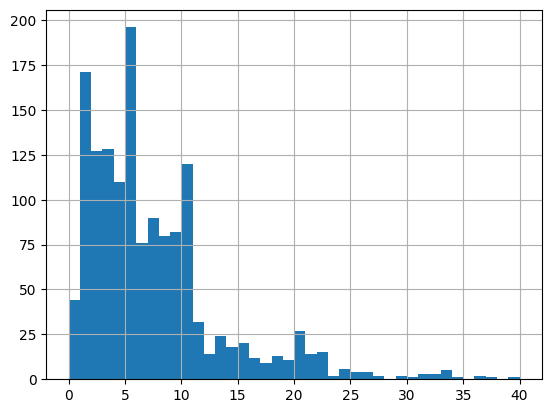

In [41]:
# Plot YearsAtCompany from attrition_pop as a histogram
attrition_pop["YearsAtCompany"].hist(bins=np.arange(0, 41, 1))
plt.show()

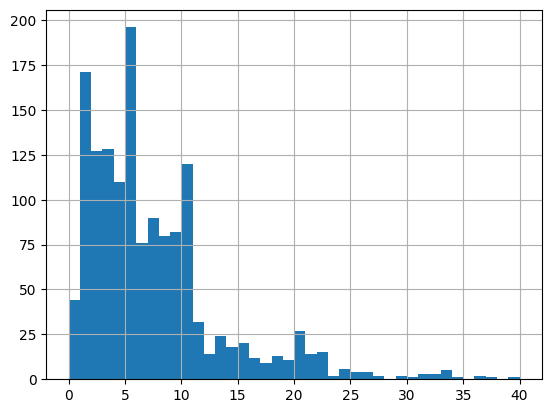

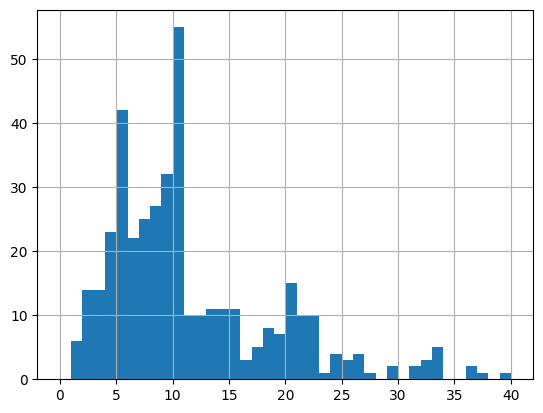

In [42]:
# Plot YearsAtCompany from attrition_pop as a histogram
attrition_pop['YearsAtCompany'].hist(bins=np.arange(0, 41, 1))
plt.show()

# Sample 400 employees weighted by YearsAtCompany
attrition_weight = attrition_pop.sample(n=400, weights="YearsAtCompany")

# Plot YearsAtCompany from attrition_weight as a histogram
attrition_weight['YearsAtCompany'].hist(bins=np.arange(0, 41, 1))
plt.show()



#### **Cluster sampling**

1. Stratified sampling vs. cluster sampling
Stratified sampling
    Split the population into subgroups
    Use simple random sampling on every subgroup
Cluster sampling
    Use simple random sampling to pick some subgroups
    Use simple random sampling on only those subgroups
2. Varieties of coffee
varieties_pop = list(coffee_ratings['variety'].unique())

[None, 'Other', 'Bourbon', 'Catimor',
'Ethiopian Yirgacheffe','Caturra',
'SL14', 'Sumatra', 'SL34', 'Hawaiian Kona',
'Yellow Bourbon', 'SL28', 'Gesha', 'Catuai',
'Pacamara', 'Typica', 'Sumatra Lintong',
'Mundo Novo', 'Java', 'Peaberry', 'Pacas',
'Mandheling', 'Ruiru 11', 'Arusha',
'Ethiopian Heirlooms', 'Moka Peaberry',
'Sulawesi', 'Blue Mountain', 'Marigojipe',
'Pache Comun']
3. Stage 1: sampling for subgroups
import random
varieties_samp = random.sample(varieties_pop, k=3)

['Hawaiian Kona', 'Bourbon', 'SL28']
4. Stage 2: sampling each groupStage 2: sampling each group
variety_condition = coffee_ratings['variety'].isin(varieties_samp)
coffee_ratings_cluster = coffee_ratings[variety_condition]
coffee_ratings_cluster['variety'] = coffee_ratings_cluster['variety'].cat.remove_unused_categories()
coffee_ratings_cluster.groupby("variety")\
.sample(n=5, random_state=2021)

5. Multistage sampling
Cluster sampling is a type of multistage sampling
Can have > 2 stages
E.g., countrywide surveys may sample states, counties, cities, and neighborhoods

In [43]:
varieties_pop = list(coffee_ratings['variety'].unique())
print(varieties_pop)


[None, 'Other', 'Bourbon', 'Catimor', 'Ethiopian Yirgacheffe', 'Caturra', 'SL14', 'Sumatra', 'SL34', 'Hawaiian Kona', 'Yellow Bourbon', 'SL28', 'Gesha', 'Catuai', 'Pacamara', 'Typica', 'Sumatra Lintong', 'Mundo Novo', 'Java', 'Peaberry', 'Pacas', 'Mandheling', 'Ruiru 11', 'Arusha', 'Ethiopian Heirlooms', 'Moka Peaberry', 'Sulawesi', 'Blue Mountain', 'Marigojipe', 'Pache Comun']


In [44]:
import random
varieties_samp = random.sample(varieties_pop, k=3)
print(varieties_samp)

['Catuai', 'Bourbon', 'Typica']


In [45]:
variety_condition = coffee_ratings['variety'].isin(varieties_samp)
coffee_ratings_cluster = coffee_ratings[variety_condition]
coffee_ratings_cluster['variety'] = coffee_ratings_cluster['variety'].astype('category')
coffee_ratings_cluster['variety'] = coffee_ratings_cluster['variety'].cat.remove_unused_categories()

coffee_ratings_cluster.groupby("variety")\
.sample(n=5, random_state=2021)

C:\Users\mcaba\AppData\Local\Temp\ipykernel_7900\773719370.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coffee_ratings_cluster['variety'] = coffee_ratings_cluster['variety'].astype('category')
C:\Users\mcaba\AppData\Local\Temp\ipykernel_7900\773719370.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coffee_ratings_cluster['variety'] = coffee_ratings_cluster['variety'].cat.remove_unused_categories()


,total_cup_points,species,owner,country_of_origin,farm_name,lot_number,mill,ico_number,company,altitude,...,color,category_two_defects,expiration,certification_body,certification_address,certification_contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
575,82.83,Arabica,juan luis alvarado romero,Guatemala,agropecuaria quiagral,None,beneficio ixchel,11/23/0934,"unex guatemala, s.a.",4300,...,Green,10.0,"July 9th, 2013",Asociacion Nacional Del Café,b1f20fe3a819fd6b2ee0eb8fdc3da256604f1e53,724f04ad10ed31dbb9d260f0dfd221ba48be8a95,ft,1310.64,1310.64,1310.64
560,82.83,Arabica,juan luis alvarado romero,Guatemala,piamonte,11/23/0513,beneficio ixchel,11/23/0513,"unex guatemala, s.a.",1700,...,Green,2.0,"June 22nd, 2018",Asociacion Nacional Del Café,b1f20fe3a819fd6b2ee0eb8fdc3da256604f1e53,724f04ad10ed31dbb9d260f0dfd221ba48be8a95,m,1700.00,1700.00,1700.00
524,83.00,Arabica,juan luis alvarado romero,Guatemala,la igualdad,None,beneficio la igualdad,11/194/07,"nuevos mercados, s.a.",4500,...,Green,2.0,"April 27th, 2013",Asociacion Nacional Del Café,b1f20fe3a819fd6b2ee0eb8fdc3da256604f1e53,724f04ad10ed31dbb9d260f0dfd221ba48be8a95,ft,1371.60,1371.60,1371.60
1140,79.83,Arabica,juan luis alvarado romero,Guatemala,piamonte,11/23/0639,beneficio ixchel,11/23/0639,"unex guatemala, s.a.",1700,...,Green,2.0,"August 22nd, 2018",Asociacion Nacional Del Café,b1f20fe3a819fd6b2ee0eb8fdc3da256604f1e53,724f04ad10ed31dbb9d260f0dfd221ba48be8a95,m,1700.00,1700.00,1700.00
318,83.67,Arabica,ipanema coffees,Brazil,capoeirinha,008/16A,dry mill,002/1660/0106,ipanema coffees,934,...,Green,3.0,"August 16th, 2017",Brazil Specialty Coffee Association,3297cfa4c538e3dd03f72cc4082c54f7999e1f9d,8900f0bf1d0b2bafe6807a73562c7677d57eb980,m,934.00,934.00,934.00
1032,80.83,Arabica,luis roberto fermoso beltran,Mexico,la victoria pante nubes,None,predio santo domingo,1506717737,productora rural la victoria s.p.r. de r.l.,1210,...,Green,7.0,"August 30th, 2013",AMECAFE,59e396ad6e22a1c22b248f958e1da2bd8af85272,0eb4ee5b3f47b20b049548a2fd1e7d4a2b70d0a7,m,1210.00,1210.00,1210.00
566,82.83,Arabica,cafebras,Brazil,santa fé 2,None,via seca,002/1495/0695,cafebras comercio de cafés do brasil sa,900,...,Green,6.0,"May 25th, 2016",Brazil Specialty Coffee Association,3297cfa4c538e3dd03f72cc4082c54f7999e1f9d,8900f0bf1d0b2bafe6807a73562c7677d57eb980,m,900.00,900.00,900.00
965,81.25,Arabica,cadexsa,Honduras,cerro bueno,None,cadexsa,13-63-301,cadexsa,1400 msn,...,Green,1.0,"May 11th, 2016",Instituto Hondureño del Café,b4660a57e9f8cc613ae5b8f02bfce8634c763ab4,7f521ca403540f81ec99daec7da19c2788393880,m,1400.00,1400.00,1400.00
1135,79.92,Arabica,montegrande,Mexico,finca monte grande,None,"finca montegrande, jaltenango",0,None,1100,...,Green,3.0,"July 26th, 2013",AMECAFE,59e396ad6e22a1c22b248f958e1da2bd8af85272,0eb4ee5b3f47b20b049548a2fd1e7d4a2b70d0a7,m,1100.00,1100.00,1100.00
58,85.83,Arabica,juan luis alvarado romero,Guatemala,finca el limon,None,beneficio serben,11-853-155,unicafe,4650,...,Bluish-Green,1.0,"June 5th, 2013",Asociacion Nacional Del Café,b1f20fe3a819fd6b2ee0eb8fdc3da256604f1e53,724f04ad10ed31dbb9d260f0dfd221ba48be8a95,ft,1417.32,1417.32,1417.32


Performing cluster sampling
Now that you know when to use cluster sampling, it's time to put it into action. In this exercise, you'll explore the JobRole column of the attrition dataset. You can think of each job role as a subgroup of the whole population of employees.

attrition_pop is available; pandas is loaded with its usual alias, and the random package is available. A seed of 19790801 has also been set with random.seed().

In [46]:
random.seed(19790801)

# Create a list of unique JobRole values
job_roles_pop = list(attrition_pop['JobRole'].unique())
print(job_roles_pop)

# Randomly sample four JobRole values
job_roles_samp = random.sample(job_roles_pop, k=4)

# Print the result
print(job_roles_samp)

['Research_Scientist', 'Sales_Representative', 'Laboratory_Technician', 'Human_Resources', 'Sales_Executive', 'Manufacturing_Director', 'Healthcare_Representative', 'Research_Director', 'Manager']
['Research_Director', 'Research_Scientist', 'Human_Resources', 'Manager']


In [47]:
# Create a list of unique JobRole values
job_roles_pop = list(attrition_pop['JobRole'].unique())

# Randomly sample four JobRole values
job_roles_samp = random.sample(job_roles_pop, k=4)

# Filter for rows where JobRole is in job_roles_samp
jobrole_condition = attrition_pop['JobRole'].isin(job_roles_samp)
attrition_filtered = attrition_pop[jobrole_condition]

# Print the result
print(attrition_filtered)

      Age  Attrition     BusinessTravel  DailyRate            Department  \
30     19        1.0      Travel_Rarely        489       Human_Resources   
77     24        1.0      Travel_Rarely        240       Human_Resources   
81     29        0.0      Travel_Rarely        352       Human_Resources   
88     27        1.0  Travel_Frequently       1337       Human_Resources   
116    34        1.0      Travel_Rarely       1107       Human_Resources   
...   ...        ...                ...        ...                   ...   
1458   56        0.0  Travel_Frequently        906                 Sales   
1459   54        0.0      Travel_Rarely        685  Research_Development   
1467   58        0.0      Travel_Rarely        682                 Sales   
1468   58        1.0      Travel_Rarely        147  Research_Development   
1469   58        1.0      Travel_Rarely        286  Research_Development   

      DistanceFromHome      Education    EducationField  \
30                   2      

In [48]:
# Create a list of unique JobRole values
job_roles_pop = list(attrition_pop['JobRole'].unique())

# Randomly sample four JobRole values
job_roles_samp = random.sample(job_roles_pop, k=4)

# Filter for rows where JobRole is in job_roles_samp
jobrole_condition = attrition_pop['JobRole'].isin(job_roles_samp)
attrition_filtered = attrition_pop[jobrole_condition]

# Remove categories with no rows
attrition_filtered['JobRole'] = attrition_filtered['JobRole'].cat.remove_unused_categories()

# Randomly sample 10 employees from each sampled job role
attrition_clust = attrition_filtered.groupby("JobRole")\
.sample(n=10, random_state=2022)



# Print the sample
print(attrition_clust)

      Age  Attrition     BusinessTravel  DailyRate            Department  \
1380   44        0.0      Travel_Rarely       1099                 Sales   
1395   46        0.0      Travel_Rarely        488                 Sales   
1300   42        0.0      Travel_Rarely        532  Research_Development   
1271   39        0.0      Travel_Rarely        117  Research_Development   
1354   42        0.0      Travel_Rarely       1059  Research_Development   
858    32        0.0      Travel_Rarely        495  Research_Development   
1417   59        0.0         Non-Travel       1420       Human_Resources   
1307   41        0.0      Travel_Rarely       1276                 Sales   
1377   52        0.0      Travel_Rarely       1053  Research_Development   
1388   50        0.0      Travel_Rarely        264                 Sales   
1463   56        0.0      Travel_Rarely       1400  Research_Development   
464    46        0.0         Non-Travel       1144  Research_Development   
1313   54   

C:\Users\mcaba\AppData\Local\Temp\ipykernel_7900\2079348606.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  attrition_filtered['JobRole'] = attrition_filtered['JobRole'].cat.remove_unused_categories()


#### **Comparing sampling methods**

1. Review of sampling techniques - setup
top_counted_countries = ["Mexico", "Colombia", "Guatemala",
"Brazil", "Taiwan", "United States (Hawaii)"]
subset_condition = coffee_ratings['country_of_origin'].isin(top_counted_countries)
coffee_ratings_top = coffee_ratings[subset_condition]
coffee_ratings_top.shape
2. Review of simple random sampling
coffee_ratings_srs = coffee_ratings_top.sample(frac=1/3, random_state=2021)
coffee_ratings_srs.shape
3. Review of stratified sampling
coffee_ratings_strat = coffee_ratings_top.groupby("country_of_origin")\
.sample(frac=1/3, random_state=2021)
coffee_ratings_strat.shape
4. Review of cluster sampling
import random
top_countries_samp = random.sample(top_counted_countries, k=2)
top_condition = coffee_ratings_top['country_of_origin'].isin(top_countries_samp)
coffee_ratings_cluster = coffee_ratings_top[top_condition]
coffee_ratings_cluster['country_of_origin'] = coffee_ratings_cluster['country_of_origin']\
.cat.remove_unused_categories()
coffee_ratings_clust = coffee_ratings_cluster.groupby("country_of_origin")\
.sample(n=len(coffee_ratings_top) // 6)
coffee_ratings_clust.shape
5. Calculating mean cup points
Population
coffee_ratings_top['total_cup_points'].mean()

Simple random sample
coffee_ratings_srs['total_cup_points'].mean()

Stratified sample
coffee_ratings_strat['total_cup_points'].mean()

Cluster sample
coffee_ratings_clust['total_cup_points'].mean()
6. Mean cup points by country: simple random
Population
coffee_ratings_top.groupby("country_of_origin")\
['total_cup_points'].mean()

Simple random sample:
coffee_ratings_srs.groupby("country_of_origin")\
['total_cup_points'].mean()

Stratified sample:
coffee_ratings_strat.groupby("country_of_origin")\ 
['total_cup_points'].mean()

Cluster sample:
coffee_ratings_clust.groupby("country_of_origin")\ 
['total_cup_points'].mean()

In [49]:
top_counted_countries = ["Mexico", "Colombia", "Guatemala",
"Brazil", "Taiwan", "United States (Hawaii)"]
subset_condition = coffee_ratings['country_of_origin'].isin(top_counted_countries)
coffee_ratings_top = coffee_ratings[subset_condition]
coffee_ratings_top.shape

(880, 43)

In [50]:
coffee_ratings_srs = coffee_ratings_top.sample(frac=1/3, random_state=2021)
coffee_ratings_srs.shape

(293, 43)

In [51]:
coffee_ratings_strat = coffee_ratings_top.groupby("country_of_origin")\
.sample(frac=1/3, random_state=2021)
coffee_ratings_strat.shape

(293, 43)

In [52]:
import random
top_countries_samp = random.sample(top_counted_countries, k=2)
top_condition = coffee_ratings_top['country_of_origin'].isin(top_countries_samp)
coffee_ratings_cluster = coffee_ratings_top[top_condition]

coffee_ratings_cluster['country_of_origin'] = coffee_ratings_cluster['country_of_origin'].astype('category')

coffee_ratings_cluster['country_of_origin'] = coffee_ratings_cluster['country_of_origin']\
.cat.remove_unused_categories()
yellowcard = len(coffee_ratings_top) // 16
coffee_ratings_clust = coffee_ratings_cluster.groupby("country_of_origin")\
.sample(n=yellowcard)
coffee_ratings_clust.shape

C:\Users\mcaba\AppData\Local\Temp\ipykernel_7900\1576403616.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coffee_ratings_cluster['country_of_origin'] = coffee_ratings_cluster['country_of_origin'].astype('category')
C:\Users\mcaba\AppData\Local\Temp\ipykernel_7900\1576403616.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coffee_ratings_cluster['country_of_origin'] = coffee_ratings_cluster['country_of_origin']\


(110, 43)

In [53]:
##Population
display(coffee_ratings_top['total_cup_points'].mean())

##Simple random sample
display(coffee_ratings_srs['total_cup_points'].mean())

##Stratified sample
display(coffee_ratings_strat['total_cup_points'].mean())

##Cluster sample
display(coffee_ratings_clust['total_cup_points'].mean())

81.94700000000002

81.91331058020478

81.92566552901025

82.15372727272727

In [54]:
##Population
display(coffee_ratings_top.groupby("country_of_origin")['total_cup_points'].mean())

##Simple random sample
display(coffee_ratings_srs.groupby("country_of_origin")['total_cup_points'].mean())

##Stratified sample
display(coffee_ratings_strat.groupby("country_of_origin")['total_cup_points'].mean())

##Cluster sample
display(coffee_ratings_clust.groupby("country_of_origin")['total_cup_points'].mean())

country_of_origin
Brazil                    82.405909
Colombia                  83.106557
Guatemala                 81.846575
Mexico                    80.890085
Taiwan                    82.001333
United States (Hawaii)    81.820411
Name: total_cup_points, dtype: float64

country_of_origin
Brazil                    82.251875
Colombia                  82.961014
Guatemala                 81.392917
Mexico                    81.152000
Taiwan                    81.957391
United States (Hawaii)    81.766400
Name: total_cup_points, dtype: float64

country_of_origin
Brazil                    82.499773
Colombia                  83.288197
Guatemala                 81.727667
Mexico                    80.994684
Taiwan                    81.846800
United States (Hawaii)    81.051667
Name: total_cup_points, dtype: float64

country_of_origin
Brazil                    82.469818
United States (Hawaii)    81.837636
Name: total_cup_points, dtype: float64

3 kinds of sampling
You're going to compare the performance of point estimates using simple, stratified, and cluster sampling. Before doing that, you'll have to set up the samples.

You'll use the RelationshipSatisfaction column of the attrition_pop dataset, which categorizes the employee's relationship with the company. It has four levels: Low, Medium, High, and Very_High. pandas has been loaded with its usual alias, and the random package has been loaded.

In [55]:
# Perform simple random sampling to get 0.25 of the population
attrition_srs = attrition_pop.sample(frac=1/4, random_state=2022)
attrition_srs.shape

(368, 31)

In [56]:
# Perform stratified sampling to get 0.25 of each relationship group
attrition_strat = attrition_pop.groupby("RelationshipSatisfaction").sample(frac=1/4, random_state=2022)
attrition_strat.shape

(368, 31)

In [57]:
# Create a list of unique RelationshipSatisfaction values
satisfaction_unique = list(attrition_pop['RelationshipSatisfaction'].unique())

# Randomly sample 2 unique satisfaction values
satisfaction_samp = random.sample(satisfaction_unique, k=2)

# Filter for satisfaction_samp and clear unused categories from RelationshipSatisfaction
satis_condition = attrition_pop['RelationshipSatisfaction'].isin(satisfaction_samp)
attrition_clust_prep = attrition_pop[satis_condition]
attrition_clust_prep['RelationshipSatisfaction'] = attrition_clust_prep['RelationshipSatisfaction'].cat.remove_unused_categories()

# Perform cluster sampling on the selected group, getting 0.25 of attrition_pop
attrition_clust = attrition_clust_prep.groupby("RelationshipSatisfaction").sample(n=(len(attrition_pop) // 12), random_state=2022)


C:\Users\mcaba\AppData\Local\Temp\ipykernel_7900\1976045936.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  attrition_clust_prep['RelationshipSatisfaction'] = attrition_clust_prep['RelationshipSatisfaction'].cat.remove_unused_categories()


Comparing point estimates
Now that you have three types of sample (simple, stratified, and cluster), you can compare point estimates from each sample to the population parameter. That is, you can calculate the same summary statistic on each sample and see how it compares to the summary statistic for the population.

Here, we'll look at how satisfaction with the company affects whether or not the employee leaves the company. That is, you'll calculate the proportion of employees who left the company (they have an Attrition value of 1) for each value of RelationshipSatisfaction.

attrition_pop, attrition_srs, attrition_strat, and attrition_clust are available; pandas is loaded with its usual alias.

In [58]:
# Mean Attrition by RelationshipSatisfaction group
mean_attrition_pop = attrition_pop.groupby("RelationshipSatisfaction")['Attrition'].mean()

# Print the result
print(mean_attrition_pop)

RelationshipSatisfaction
Low          0.206522
Medium       0.148515
High         0.154684
Very_High    0.148148
Name: Attrition, dtype: float64


In [59]:
# Calculate the same thing for the simple random sample 
mean_attrition_srs = attrition_srs.groupby("RelationshipSatisfaction")['Attrition'].mean()

# Print the result
print(mean_attrition_srs)

RelationshipSatisfaction
Low          0.134328
Medium       0.164179
High         0.160000
Very_High    0.155963
Name: Attrition, dtype: float64


In [60]:
# Calculate the same thing for the stratified sample 
mean_attrition_strat = attrition_strat.groupby("RelationshipSatisfaction")['Attrition'].mean()

# Print the result
print(mean_attrition_strat)

RelationshipSatisfaction
Low          0.144928
Medium       0.078947
High         0.165217
Very_High    0.129630
Name: Attrition, dtype: float64


In [61]:
# Calculate the same thing for the cluster sample 
mean_attrition_clust = attrition_clust.groupby("RelationshipSatisfaction")['Attrition'].mean()

# Print the result
print(mean_attrition_clust)

RelationshipSatisfaction
Low          0.245902
Very_High    0.106557
Name: Attrition, dtype: float64


## **Sampling Distributions (Module 03-053)**

#### **Relative error of point estimates**

1. Sample size is number of rows
len(coffee_ratings.sample(n=300))
len(coffee_ratings.sample(frac=0.25))
2. Various sample sizes
coffee_ratings['total_cup_points'].mean()
coffee_ratings.sample(n=10)['total_cup_points'].mean()
coffee_ratings.sample(n=100)['total_cup_points'].mean()
coffee_ratings.sample(n=1000)['total_cup_points'].mean()
3. Relative errors
Population parameter:
population_mean = coffee_ratings['total_cup_points'].mean()
Point estimate:
sample_mean = coffee_ratings.sample(n=sample_size)['total_cup_points'].mean()
Relative error as a percentage:
rel_error_pct = 100 * abs(population_mean-sample_mean) / population_mean
4. Relative error vs. sample size
import matplotlib.pyplot as plt
errors.plot(x="sample_size",
y="relative_error",
kind="line")
plt.show()


Properties:
Really noise, particularly for small samples
Amplitude is initially steep, then flattens
Relative error decreases to zero (when the
sample size = population)

In [62]:
display(
len(coffee_ratings.sample(n=300))
)

display(
len(coffee_ratings.sample(frac=0.25))
)

300

334

In [63]:
display(
coffee_ratings['total_cup_points'].mean()
)

display(
coffee_ratings.sample(n=10)['total_cup_points'].mean()
)

display(
coffee_ratings.sample(n=100)['total_cup_points'].mean()
)

display(
coffee_ratings.sample(n=1000)['total_cup_points'].mean()
)

82.15120328849028

83.21000000000001

81.64569999999999

82.2164

In [64]:

population_mean = coffee_ratings['total_cup_points'].mean()

sample_mean = coffee_ratings.sample(n=sample_size)['total_cup_points'].mean()

rel_error_pct = 100 * abs(population_mean-sample_mean) / population_mean

print(population_mean,sample_mean,rel_error_pct,sample_size)


82.15120328849028 82.18142857142857 0.036792258333876525 70


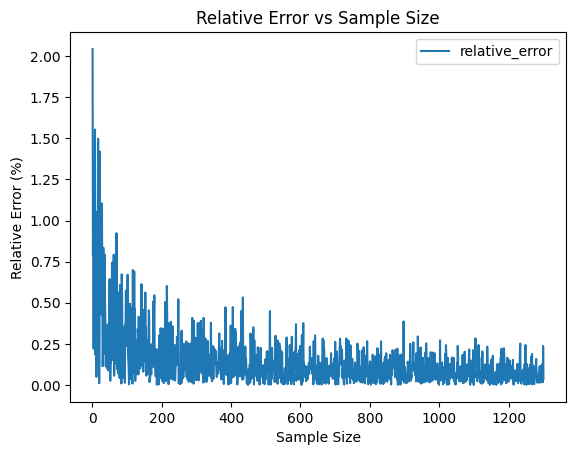

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming coffee_ratings is your DataFrame and 'total_cup_points' is the column of interest
# Example: coffee_ratings = pd.read_csv('coffee_ratings.csv')

# Step 1: Define the population mean (you need to calculate or know this value)
population_mean = coffee_ratings['total_cup_points'].mean()

# Step 2: Create a list of sample sizes (from 1 to 1500)
sample_sizes = list(range(1, 1301))

# Step 3: Initialize lists to store sample sizes and relative errors
sample_size_list = []
relative_error_list = []

# Step 4: Calculate the relative error for each sample size
for sample_size in sample_sizes:
    sample_mean = coffee_ratings.sample(n=sample_size, replace=True)['total_cup_points'].mean()
    relative_error = 100 * abs(population_mean - sample_mean) / population_mean
    
    sample_size_list.append(sample_size)
    relative_error_list.append(relative_error)

# Step 5: Create the errors DataFrame
errors = pd.DataFrame({
    'sample_size': sample_size_list,
    'relative_error': relative_error_list
})

# Step 6: Plot the results
errors.plot(x="sample_size", y="relative_error", kind="line")
plt.xlabel("Sample Size")
plt.ylabel("Relative Error (%)")
plt.title("Relative Error vs Sample Size")
plt.show()

Calculating relative errors
The size of the sample you take affects how accurately the point estimates reflect the corresponding population parameter. For example, when you calculate a sample mean, you want it to be close to the population mean. However, if your sample is too small, this might not be the case.

The most common metric for assessing accuracy is relative error. This is the absolute difference between the population parameter and the point estimate, all divided by the population parameter. It is sometimes expressed as a percentage.

attrition_pop and mean_attrition_pop (the mean of the Attrition column of attrition_pop) are available; pandas is loaded as pd.

In [66]:
# Generate a simple random sample of 50 rows, with seed 2022
attrition_srs50 = attrition_pop.sample(n=50, random_state=2022)

# Calculate the mean employee attrition in the sample
mean_attrition_srs50 = attrition_srs50['Attrition'].mean()

# Calculate the relative error percentage
rel_error_pct50 = 100 * abs(mean_attrition_pop-mean_attrition_srs50) / mean_attrition_pop

# Print rel_error_pct50
print(rel_error_pct50)

RelationshipSatisfaction
Low          70.947368
Medium       59.600000
High         61.211268
Very_High    59.500000
Name: Attrition, dtype: float64


In [67]:
# Generate a simple random sample of 100 rows, with seed 2022
attrition_srs100 = attrition_pop.sample(n=100, random_state=2022)

# Calculate the mean employee attrition in the sample
mean_attrition_srs100 = attrition_srs100['Attrition'].mean()

# Calculate the relative error percentage
rel_error_pct100 = 100 * abs(mean_attrition_pop-mean_attrition_srs100) / mean_attrition_pop

# Print rel_error_pct100
print(rel_error_pct100)

RelationshipSatisfaction
Low          27.368421
Medium        1.000000
High          3.028169
Very_High     1.250000
Name: Attrition, dtype: float64


Relative error vs. sample size
The plot shows the relative error in the proportion of employee attritions, using simple random sampling, for sample sizes from 2 to 1470 (the size of the population).

Clicking "Regenerate plot" will select new samples for each sample size, and calculate the relative errors again.

Which statement about relative errors and sample sizes is true?
r
For small sample sizes, each additional entry in a sample can result in substantial decreases to the relative error.

#### **Creating a sampling distribution**

1. Same code, different answer
coffee_ratings.sample(n=30)['total_cup_points'].mean()
2. Same code, 1000 times
mean_cup_points_1000 = []
for i in range(1000):
mean_cup_points_1000.append(
coffee_ratings.sample(n=30)['total_cup_points'].mean()
)
print(mean_cup_points_1000)
3. Distribution of sample means for size 30
import matplotlib.pyplot as plt
plt.hist(mean_cup_points_1000, bins=30)
plt.show()

In [68]:
display(
coffee_ratings.sample(n=30)['total_cup_points'].mean()
)

display(
coffee_ratings.sample(n=30)['total_cup_points'].mean()
)

display(
coffee_ratings.sample(n=30)['total_cup_points'].mean()
)

display(
coffee_ratings.sample(n=30)['total_cup_points'].mean()
)

81.52233333333334

82.44533333333334

81.44200000000001

81.49833333333335

In [70]:
mean_cup_points_1000 = []
for i in range(1000):
    mean_cup_points_1000.append(
        coffee_ratings.sample(n=30)['total_cup_points'].mean()
    )
print(mean_cup_points_1000)

[81.879, 81.47433333333333, 82.49733333333333, 82.06633333333333, 81.74733333333333, 82.65833333333333, 81.97533333333334, 82.747, 82.82433333333331, 81.88300000000001, 81.55, 82.48033333333333, 82.359, 82.42533333333334, 82.58633333333334, 82.25233333333333, 81.56666666666666, 82.13633333333334, 81.63633333333334, 81.06400000000001, 81.60799999999999, 81.93333333333334, 81.96466666666667, 82.78333333333333, 82.386, 82.12866666666667, 81.897, 82.48700000000001, 82.33666666666667, 82.41966666666667, 81.949, 82.40866666666668, 82.82533333333332, 82.417, 81.933, 81.96733333333333, 82.225, 82.90066666666668, 82.65533333333333, 82.525, 82.13033333333333, 81.792, 82.40633333333334, 83.019, 81.92, 82.467, 82.26766666666667, 82.81733333333334, 82.528, 82.34966666666668, 81.56933333333333, 81.24433333333333, 82.12500000000001, 82.17800000000001, 81.80033333333334, 82.253, 81.61466666666668, 81.1, 82.00066666666666, 81.37233333333333, 81.36899999999999, 81.56099999999999, 82.34733333333334, 82.5

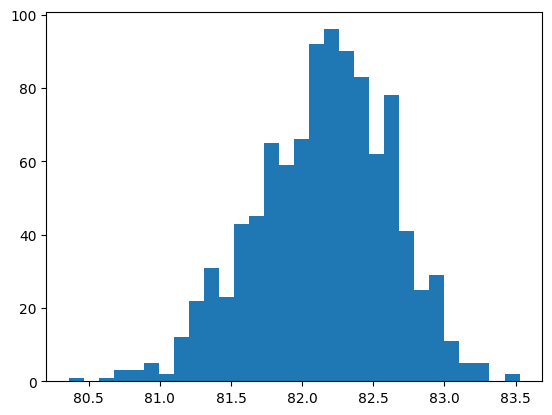

In [71]:
import matplotlib.pyplot as plt
plt.hist(mean_cup_points_1000, bins=30)
plt.show()

Replicating samples
When you calculate a point estimate such as a sample mean, the value you calculate depends on the rows that were included in the sample. That means that there is some randomness in the answer. In order to quantify the variation caused by this randomness, you can create many samples and calculate the sample mean (or another statistic) for each sample.

attrition_pop is available; pandas and matplotlib.pyplot are loaded with their usual aliases.

In [74]:
# Create an empty list
mean_attritions = []
# Loop 500 times to create 500 sample means
for i in range(500):
	mean_attritions.append(
    	attrition_pop.sample(n=60)['Attrition'].mean()
	)
  
# Print out the first few entries of the list
print(mean_attritions[0:5])

[0.1, 0.16666666666666666, 0.16666666666666666, 0.18333333333333332, 0.25]


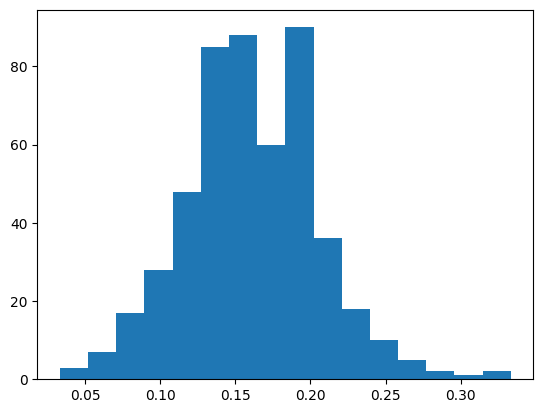

In [77]:
# Create an empty list
mean_attritions = []
# Loop 500 times to create 500 sample means
for i in range(500):
	mean_attritions.append(
    	attrition_pop.sample(n=60)['Attrition'].mean()
	)

# Create a histogram of the 500 sample means
plt.hist(mean_attritions, bins=16)
plt.show()

#### **Approximate sampling distributions**

1. 4 dice
dice = expand_grid(
{'die1': [1, 2, 3, 4, 5, 6],
'die2': [1, 2, 3, 4, 5, 6],
'die3': [1, 2, 3, 4, 5, 6],
'die4': [1, 2, 3, 4, 5, 6]
}
)
2. Mean roll
dice['mean_roll'] = (dice['die1'] +
dice['die2'] +
dice['die3'] +
dice['die4']) / 4
print(dice)
3. Exact sampling distribution
dice['mean_roll'] = dice['mean_roll'].astype('category')
dice['mean_roll'].value_counts(sort=False).plot(kind="bar")
4. The number of outcomes increases fast
n_dice = list(range(1, 101))
n_outcomes = []
for n in n_dice:
n_outcomes.append(6**n)
outcomes = pd.DataFrame(
{"n_dice": n_dice,
"n_outcomes": n_outcomes})
outcomes.plot(x="n_dice",
y="n_outcomes",
kind="scatter")
plt.show()
5. Simulating the mean of four dice rolls
import numpy as np 
sample_means_1000 = []
for i in range (1000): 
    sample_means_1000.append(
        np.random.choice(list(range(1, 7)), size=4, replace=True).mean()
    )
print(sample_means_1000)
6. Approximate sampling distribution
plt.hist(sample_means_1000, bins=20)

In [81]:
import itertools
import pandas as pd
import numpy as np

def expand_grid(dictionary):
    return pd.DataFrame([row for row in itertools.product(*dictionary.values())], 
                       columns=dictionary.keys())

dice = expand_grid({
    'die1': [1, 2, 3, 4, 5, 6],
    'die2': [1, 2, 3, 4, 5, 6],
    'die3': [1, 2, 3, 4, 5, 6],
    'die4': [1, 2, 3, 4, 5, 6]
})

In [82]:
dice['mean_roll'] = (dice['die1'] +
dice['die2'] +
dice['die3'] +
dice['die4']) / 4
print(dice)

      die1  die2  die3  die4  mean_roll
0        1     1     1     1       1.00
1        1     1     1     2       1.25
2        1     1     1     3       1.50
3        1     1     1     4       1.75
4        1     1     1     5       2.00
...    ...   ...   ...   ...        ...
1291     6     6     6     2       5.00
1292     6     6     6     3       5.25
1293     6     6     6     4       5.50
1294     6     6     6     5       5.75
1295     6     6     6     6       6.00

[1296 rows x 5 columns]


<AxesSubplot: >

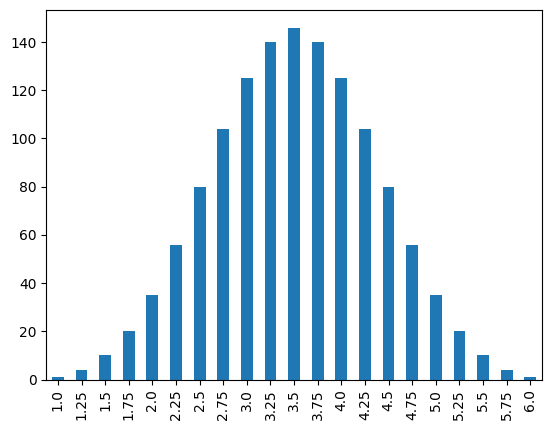

In [83]:
dice['mean_roll'] = dice['mean_roll'].astype('category')
dice['mean_roll'].value_counts(sort=False).plot(kind="bar")

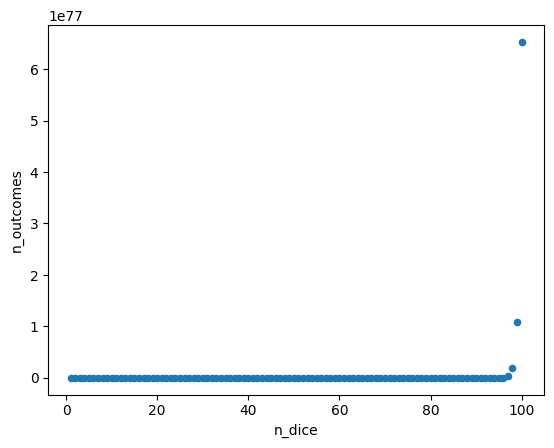

In [85]:
n_dice = list(range(1, 101))
n_outcomes = []
for n in n_dice:
    n_outcomes.append(6**n)
outcomes = pd.DataFrame(
{"n_dice": n_dice,
"n_outcomes": n_outcomes})
outcomes.plot(x="n_dice",
y="n_outcomes",
kind="scatter")
plt.show()

In [86]:
import numpy as np
np.random.choice(list(range(1, 7)), size=4, replace=True).mean()

3.25

[3.5, 4.5, 4.75, 3.25, 4.0, 3.25, 4.5, 2.0, 4.0, 4.0, 5.0, 3.75, 2.0, 4.25, 2.75, 3.75, 2.75, 4.25, 2.75, 5.0, 4.25, 4.75, 3.25, 3.0, 3.0, 5.75, 4.75, 3.25, 3.0, 1.75, 4.5, 3.5, 3.0, 3.25, 2.0, 4.5, 4.25, 3.25, 2.75, 3.75, 3.0, 4.0, 3.5, 3.5, 4.0, 3.5, 2.5, 3.75, 2.25, 3.5, 2.75, 2.5, 4.25, 3.25, 3.25, 4.0, 3.75, 3.75, 1.75, 2.5, 3.75, 3.75, 2.75, 5.25, 4.0, 3.5, 3.25, 3.5, 2.25, 3.0, 4.5, 3.0, 4.25, 4.0, 3.5, 5.75, 3.25, 4.25, 3.5, 2.75, 3.75, 4.75, 3.25, 4.0, 2.0, 3.5, 3.5, 2.75, 5.0, 3.25, 3.25, 3.0, 3.5, 3.75, 4.0, 3.25, 2.25, 3.0, 3.0, 3.25, 2.75, 3.5, 4.5, 2.75, 3.5, 4.25, 4.5, 3.75, 4.5, 4.25, 3.5, 3.25, 2.5, 3.75, 3.25, 3.25, 3.0, 3.0, 4.0, 4.0, 3.25, 4.0, 3.25, 4.25, 3.0, 4.0, 4.0, 3.25, 3.0, 3.75, 3.5, 4.75, 2.5, 3.75, 3.25, 1.75, 2.5, 4.75, 3.75, 3.25, 3.5, 4.75, 2.75, 2.75, 3.0, 4.5, 3.75, 2.5, 3.5, 3.75, 3.25, 3.5, 3.25, 4.25, 1.75, 2.25, 3.25, 3.5, 1.75, 4.0, 2.75, 2.0, 4.0, 4.5, 5.0, 5.25, 2.5, 3.25, 3.0, 2.75, 4.75, 3.5, 2.75, 3.75, 2.25, 4.0, 4.0, 3.25, 3.0, 3.5, 2.75,

(array([  2.,   4.,  23.,  21.,  38.,  68.,  78.,  87., 133.,   0., 112.,
        102.,  99.,  73.,  58.,  49.,  25.,  16.,   9.,   3.]),
 array([1.25 , 1.475, 1.7  , 1.925, 2.15 , 2.375, 2.6  , 2.825, 3.05 ,
        3.275, 3.5  , 3.725, 3.95 , 4.175, 4.4  , 4.625, 4.85 , 5.075,
        5.3  , 5.525, 5.75 ]),
 <BarContainer object of 20 artists>)

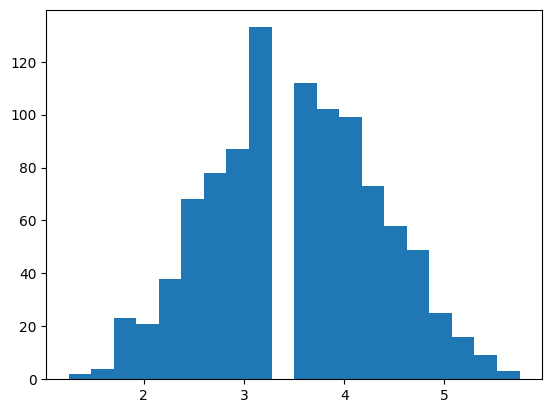

In [88]:
import numpy as np 
sample_means_1000 = []
for i in range (1000): 
    sample_means_1000.append(
        np.random.choice(list(range(1, 7)), size=4, replace=True).mean()
    )
print(sample_means_1000)

plt.hist(sample_means_1000, bins=20)

Exact sampling distribution
To quantify how the point estimate (sample statistic) you are interested in varies, you need to know all the possible values it can take and how often. That is, you need to know its distribution.

The distribution of a sample statistic is called the sampling distribution. When we can calculate this exactly, rather than using an approximation, it is known as the exact sampling distribution.

Let's take another look at the sampling distribution of dice rolls. This time, we'll look at five eight-sided dice. (These have the numbers one to eight.)

pandas, numpy, and matplotlib.pyplot are loaded with their usual aliases. The expand_grid() function is also available, which expects a dictionary of key-value pairs as its argument. The definition of the expand_grid() function is provided in the pandas documentation.

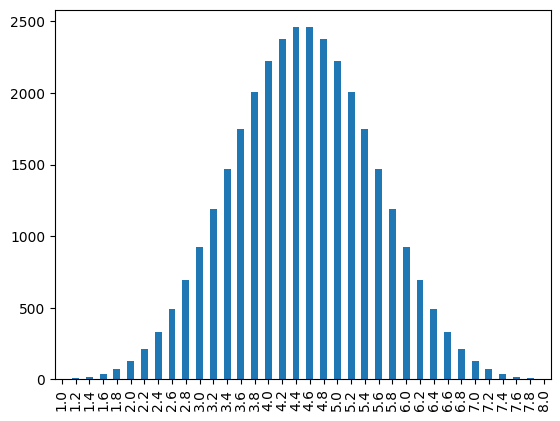

In [91]:
# Expand a grid representing five 8-sided dice
dice = expand_grid(
  {'die1': [1, 2, 3, 4, 5, 6, 7, 8],
   'die2': [1, 2, 3, 4, 5, 6, 7, 8],
   'die3': [1, 2, 3, 4, 5, 6, 7, 8],
   'die4': [1, 2, 3, 4, 5, 6, 7, 8],
   'die5': [1, 2, 3, 4, 5, 6, 7, 8]
  })

# Add a column of mean rolls and convert to a categorical
dice['mean_roll'] = (dice['die1'] + dice['die2'] + 
                     dice['die3'] + dice['die4'] + 
                     dice['die5']) / 5
dice['mean_roll'] = dice['mean_roll'].astype('category')

# Draw a bar plot of mean_roll
dice['mean_roll'].value_counts(sort=False).plot(kind="bar")
plt.show()

Generating an approximate sampling distribution
Calculating the exact sampling distribution is only possible in very simple situations. With just five eight-sided dice, the number of possible rolls is 8**5, which is over thirty thousand. When the dataset is more complicated, for example, where a variable has hundreds or thousands of categories, the number of possible outcomes becomes too difficult to compute exactly.

In this situation, you can calculate an approximate sampling distribution by simulating the exact sampling distribution. That is, you can repeat a procedure over and over again to simulate both the sampling process and the sample statistic calculation process.

pandas, numpy, and matplotlib.pyplot are loaded with their usual aliases.

In [92]:
# Sample one to eight, five times, with replacement
five_rolls = np.random.choice(list(range(1, 9)), size=5, replace=True)

# Print the mean of five_rolls
print(five_rolls.mean())

4.8


In [93]:
# Replicate the sampling code 1000 times
sample_means_1000 = []
for i in range (1000):
    sample_means_1000.append(
  		np.random.choice(list(range(1, 9)), size=5, replace=True).mean()
    )
    
# Print the first 10 entries of the result
print(sample_means_1000[0:10])

[5.2, 4.2, 5.8, 5.2, 2.6, 3.4, 4.0, 4.6, 2.6, 6.0]


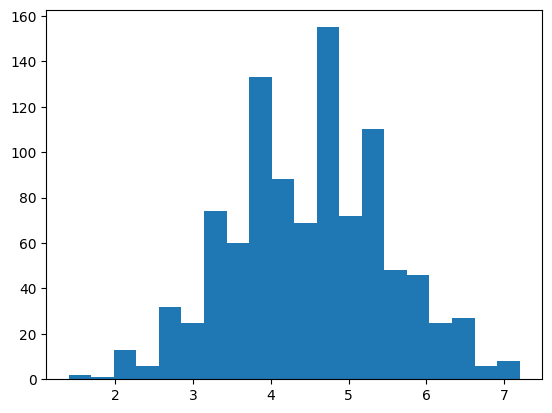

In [94]:
# Replicate the sampling code 1000 times
sample_means_1000 = []
for i in range(1000):
    sample_means_1000.append(
  		np.random.choice(list(range(1, 9)), size=5, replace=True).mean()
    )

# Draw a histogram of sample_means_1000 with 20 bins
plt.hist(sample_means_1000, bins=20)
plt.show()

#### **Standard errors and the Central Limit Theorem*

1. Consequences of the central limit theorem
Averages of independent samples have approximately normal distributions.
As the sample size increases,
The distribution of the averages gets closer to being normally distributed
The width of the sampling distribution gets narrower
2. Population & sampling distribution means
coffee_ratings['total_cup_points'].mean()
3. Population & sampling distribution standard deviations
coffee_ratings['total_cup_points'].std(ddof=0)

Specify ddof=0 when calling .std() on
populations
Specify ddof=1 when calling np.std() on
samples or sampling distributions
4. Population mean over square root sample size
Sample size Std dev sample mean Calculation Result
5 1.1886358227738543 2.685858187306438 / sqrt(5) 1.201
20 0.5940321141669805 2.685858187306438 / sqrt(20) 0.601
80 0.2934024263916487 2.685858187306438 / sqrt(80) 0.300
320 0.13095083089190876 2.685858187306438 / sqrt(320) 0.150
5. Standard error
Standard deviation of the sampling distribution
Important tool in understanding sampling variability

In [97]:
display(
coffee_ratings['total_cup_points'].mean()
)

display(
coffee_ratings['total_cup_points'].std(ddof=0)
)

82.15120328849028

2.685858187306438

Population & sampling distribution means
One of the useful features of sampling distributions is that you can quantify them. Specifically, you can calculate summary statistics on them. Here, you'll look at the relationship between the mean of the sampling distribution and the population parameter's mean.

Three sampling distributions are provided. For each, the employee attrition dataset was sampled using simple random sampling, then the mean attrition was calculated. This was done 1000 times to get a sampling distribution of mean attritions. One sampling distribution used a sample size of 5 for each replicate, one used 50, and one used 500.

attrition_pop, sampling_distribution_5, sampling_distribution_50, and sampling_distribution_500 are available; numpy as np is loaded.

In [107]:
sampling_distribution_5 = []
# Loop 500 times to create 500 sample means
for i in range(5):
	sampling_distribution_5.append(
    	attrition_pop.sample(n=5)['Attrition'].mean()
	)

In [104]:
sampling_distribution_50 = []
# Loop 500 times to create 500 sample means
for i in range(50):
	sampling_distribution_50.append(
    	attrition_pop.sample(n=50)['Attrition'].mean()
	)

In [105]:
sampling_distribution_500 = []
# Loop 500 times to create 500 sample means
for i in range(500):
	sampling_distribution_500.append(
    	attrition_pop.sample(n=500)['Attrition'].mean()
	)

In [112]:
# Calculate the mean of the mean attritions for each sampling distribution
mean_of_means_5 = np.mean(sampling_distribution_5)
mean_of_means_50 = np.mean(sampling_distribution_50)
mean_of_means_500 = np.mean(sampling_distribution_500)
# Print the results
print(mean_of_means_5)
print(mean_of_means_50)
print(mean_of_means_500)

0.08
0.1692
0.16061999999999999


Population & sampling distribution variation
You just calculated the mean of the sampling distribution and saw how it is an estimate of the corresponding population parameter. Similarly, as a result of the central limit theorem, the standard deviation of the sampling distribution has an interesting relationship with the population parameter's standard deviation and the sample size.

attrition_pop, sampling_distribution_5, sampling_distribution_50, and sampling_distribution_500 are available; numpy is loaded with its usual alias.

In [119]:
# Calculate the std. dev. of the mean attritions for each sampling distribution
sd_of_means_5 = np.std(sampling_distribution_5, ddof=1)

sd_of_means_50 = np.std(sampling_distribution_50, ddof=1)

sd_of_means_500 = np.std(sampling_distribution_500, ddof=1)

# Print the results
print(sd_of_means_5)
print(sd_of_means_50)
print(sd_of_means_500)

0.10954451150103323
0.06301408977525647
0.013537730248478179


## **Bootstrap Distributions (Module 04-053)**

#### **Introduction to bootstrapping**

1. With or without
Sampling without replacement:  poker
Sampling with replacement ("resampling"): dices
2. Why sample with replacement?
coffee_ratings : a sample of a larger population of all coffees
Each coffee in our sample represents many different hypothetical population coffees
Sampling with replacement is a proxy
3. Coffee data preparation
coffee_focus = coffee_ratings[["variety", "country_of_origin", "flavor"]]
coffee_focus = coffee_focus.reset_index()
4. Resampling with .sample()
coffee_resamp = coffee_focus.sample(frac=1, replace=True)
5. Repeated coffees
coffee_resamp["index"].value_counts()
6. Missing coffees
num_unique_coffees = len(coffee_resamp.drop_duplicates(subset="index"))
len(coffee_ratings) - num_unique_coffees

7. Bootstrapping
The opposite of sampling from a
population

Sampling: going from a population to a
smaller sample

Bootstrapping: building up a theoretical
population from the sample

Bootstrapping use case:
Develop understanding of sampling
variability using a single sample

8. Bootstrapping process

1. Make a resample of the same size as the original sample
2. Calculate the statistic of interest for this bootstrap sample
3. Repeat steps 1 and 2 many times
The resulting statistics are bootstrap statistics, and they form a bootstrap distribution

9. Bootstrapping coffee mean flavor

import numpy as np
mean_flavors_1000 = []
for i in range(1000):
mean_flavors_1000.append(
np.mean(coffee_sample.sample(frac=1, replace=True)['flavor'])
)

In [120]:
coffee_focus = coffee_ratings[["variety", "country_of_origin", "flavor"]]
coffee_focus = coffee_focus.reset_index()

In [122]:
coffee_resamp = coffee_focus.sample(frac=1, replace=True)
print(coffee_resamp)

      index        variety             country_of_origin  flavor
373     373           None        United States (Hawaii)    7.67
532     532           None                      Thailand    7.25
1131   1131  Hawaiian Kona        United States (Hawaii)    7.00
549     549        Caturra                      Colombia    7.50
879     879          Other  Tanzania, United Republic Of    7.33
...     ...            ...                           ...     ...
198     198        Caturra                      Colombia    7.67
645     645           None                     Guatemala    7.58
97       97        Caturra                      Colombia    7.92
677     677        Bourbon                     Guatemala    7.50
896     896        Bourbon                     Guatemala    7.42

[1338 rows x 4 columns]


In [123]:
coffee_resamp["index"].value_counts()

68      5
1237    5
196     5
591     4
1319    4
       ..
356     1
583     1
563     1
272     1
677     1
Name: index, Length: 847, dtype: int64

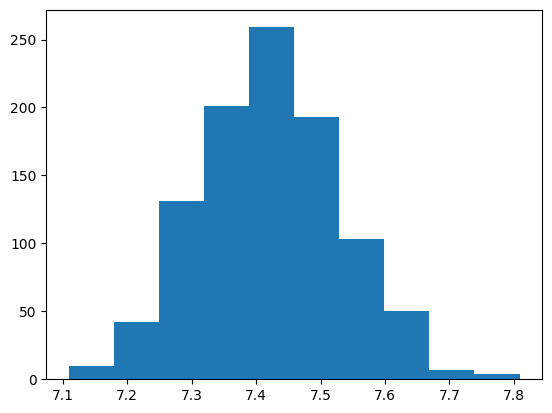

In [126]:
import numpy as np
mean_flavors_1000 = []
for i in range(1000):
    mean_flavors_1000.append(
        np.mean(coffee_sample.sample(frac=1, replace=True)['flavor'])
)
    
plt.hist(mean_flavors_1000)
plt.show()

Generating a bootstrap distribution
The process for generating a bootstrap distribution is similar to the process for generating a sampling distribution; only the first step is different.

To make a sampling distribution, you start with the population and sample without replacement. To make a bootstrap distribution, you start with a sample and sample that with replacement. After that, the steps are the same: calculate the summary statistic that you are interested in on that sample/resample, then replicate the process many times. In each case, you can visualize the distribution with a histogram.

Here, spotify_sample is a subset of the spotify_population dataset. To make it easier to see how resampling works, a row index column called 'index' has been added, and only the artist name, song name, and danceability columns have been included.

spotify_sample is available; pandas, numpy, and matplotlib.pyplot are loaded with their usual aliases.

In [128]:
# Generate 1 bootstrap resample
spotify_1_resample = spotify_sample.sample(frac=1, replace=True)

# Calculate of the danceability column of spotify_1_resample
mean_danceability_1 = np.mean(spotify_1_resample['danceability'])

# Print the result
print(mean_danceability_1)

0.5931234


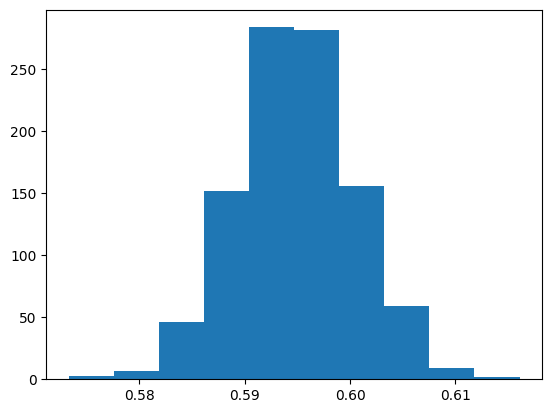

In [130]:
# Replicate this 1000 times
mean_danceability_1000 = []
for i in range(1000):
	mean_danceability_1000.append(
        np.mean(spotify_sample.sample(frac=1, replace=True)['danceability'])
	)

# Draw a histogram of the resample means
plt.hist(mean_danceability_1000)
plt.show()

#### **Comparing sampling and bootstrap distributions**

1. Coffee focused subset
coffee_sample = coffee_ratings[["variety", "country_of_origin", "flavor"]]\
.reset_index().sample(n=500)
2. The bootstrap of mean coffee flavors
import numpy as np
mean_flavors_5000 = []
for i in range(5000):
mean_flavors_5000.append(
np.mean(coffee_sample.sample(frac=1, replace=True)['flavor'])
)
bootstrap_distn = mean_flavors_5000
3. Mean flavor bootstrap distribution
import matplotlib.pyplot as plt
plt.hist(bootstrap_distn, bins=15)
plt.show()
4. Sample, bootstrap distribution, population means
coffee_sample['flavor'].mean()
coffee_ratings['flavor'].mean()
np.mean(bootstrap_distn)

5. Interpreting the means
Bootstrap distribution mean:
Usually close to the sample mean
May not be a good estimate of the population mean
Bootstrapping cannot correct biases from sampling

6. Sample sd vs. bootstrap distribution sd
Sample standard deviation:
coffee_sample['flavor'].std()

Estimated population standard deviation?
np.std(bootstrap_distn, ddof=1)

7. Sample, bootstrap dist'n, pop'n standard deviations
Sample standard deviation:
coffee_sample['flavor'].std()

True standard deviation:
coffee_ratings['flavor'].std(ddof=0)

Estimated population standard deviation:
standard_error = np.std(bootstrap_distn, ddof=1)

Standard error is the standard deviation of the
statistic of interest

standard_error * np.sqrt(500)

Standard error times square root of sample
size estimates the population standard
deviation

8. Interpreting the standard errors

Estimated standard error → standard deviation of the bootstrap distribution for a sample
statistic
Population std. dev ≈ Std. Error × √Sample size

In [ ]:
coffee_sample = coffee_ratings[["variety", "country_of_origin", "flavor"]]\
.reset_index().sample(n=500)

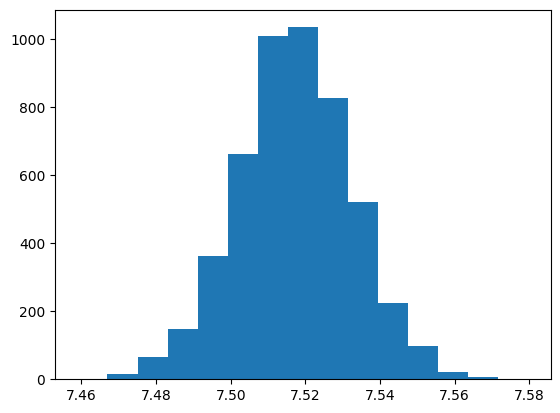

In [133]:
import numpy as np
mean_flavors_5000 = []
for i in range(5000):
    mean_flavors_5000.append(
        np.mean(coffee_sample.sample(frac=1, replace=True)['flavor'])
)
bootstrap_distn = mean_flavors_5000

plt.hist(bootstrap_distn, bins=15)
plt.show()

In [134]:
display(
coffee_sample['flavor'].mean()
)

display(
coffee_ratings['flavor'].mean()
)

display(
np.mean(bootstrap_distn)
)

7.51724

7.526046337817639

7.51715324

In [135]:
display(
coffee_sample['flavor'].std()
)

display(
np.std(bootstrap_distn, ddof=1)
)

0.3412319752336285

0.015352741762901101

In [136]:
display(
coffee_sample['flavor'].std()
)

display(
coffee_ratings['flavor'].std(ddof=0)
)

0.3412319752336285

0.34125481224622645

In [137]:
standard_error = np.std(bootstrap_distn, ddof=1)
print(standard_error * np.sqrt(500))

0.3432977422284682


Sampling distribution vs. bootstrap distribution
The sampling distribution and bootstrap distribution are closely linked. In situations where you can repeatedly sample from a population (these occasions are rare), it's helpful to generate both the sampling distribution and the bootstrap distribution, one after the other, to see how they are related.

Here, the statistic you are interested in is the mean popularity score of the songs.

spotify_population (the whole dataset) and spotify_sample (500 randomly sampled rows from spotify_population) are available; pandas and numpy are loaded with their usual aliases.

In [142]:
mean_popularity_2000_boot = []

# Generate a bootstrap distribution of 2000 replicates
for i in range(2000):
    mean_popularity_2000_boot.append(
    	# Resample 500 rows and calculate the mean popularity     
    	spotify_population.sample(n=500, replace=True)['popularity'].mean()
    )

# Print the bootstrap distribution results
print(mean_popularity_2000_boot)

[54.928, 54.654, 55.292, 55.222, 53.77, 53.942, 54.614, 55.348, 54.99, 54.392, 54.864, 54.796, 54.912, 54.88, 54.864, 54.07, 54.76, 54.946, 55.082, 54.248, 54.508, 54.508, 54.446, 55.074, 55.35, 54.104, 54.832, 55.356, 54.742, 54.104, 55.092, 55.258, 54.216, 54.658, 55.442, 54.892, 54.826, 55.93, 55.362, 54.674, 55.14, 55.11, 54.936, 54.568, 55.088, 54.318, 55.704, 54.306, 54.42, 55.67, 54.528, 56.15, 55.746, 54.702, 54.832, 54.862, 55.312, 54.688, 54.84, 54.806, 54.11, 54.606, 55.08, 54.534, 55.414, 55.424, 55.23, 54.866, 55.322, 54.304, 54.994, 55.16, 54.996, 55.73, 55.286, 55.218, 54.856, 55.202, 54.426, 54.314, 55.28, 55.008, 55.392, 54.884, 54.964, 54.488, 54.424, 54.946, 55.3, 54.854, 55.372, 54.994, 54.298, 54.686, 54.99, 54.128, 55.812, 55.122, 55.112, 54.01, 54.412, 54.144, 54.478, 55.302, 54.498, 55.114, 55.226, 54.712, 55.098, 53.652, 54.794, 54.764, 55.444, 54.98, 54.306, 54.74, 54.304, 54.072, 54.544, 55.078, 54.358, 54.082, 54.992, 54.43, 55.402, 54.68, 54.866, 55.818, 54

In [143]:
mean_popularity_2000_boot = []

# Generate a bootstrap distribution of 2000 replicates
for i in range(2000):
    mean_popularity_2000_boot.append(
    	# Resample 500 rows and calculate the mean popularity     
    	spotify_sample.sample(n=500, replace=True)['popularity'].mean()
    )

# Print the bootstrap distribution results
print(mean_popularity_2000_boot)

[53.816, 55.332, 54.134, 55.506, 54.676, 54.99, 54.32, 54.644, 54.788, 55.204, 55.448, 54.48, 54.262, 54.018, 54.798, 54.942, 53.872, 55.098, 54.388, 54.788, 54.698, 54.348, 55.188, 54.92, 54.898, 54.236, 54.124, 54.518, 54.812, 55.188, 54.85, 54.99, 54.892, 54.244, 54.776, 55.128, 54.278, 54.256, 55.206, 54.682, 55.206, 54.804, 54.718, 54.152, 54.834, 54.59, 55.28, 55.012, 54.778, 55.684, 54.796, 54.664, 55.446, 55.132, 53.77, 54.032, 54.66, 55.064, 55.466, 55.21, 54.022, 55.164, 54.822, 55.058, 54.518, 54.892, 54.138, 54.36, 55.344, 54.422, 55.282, 55.112, 55.298, 55.336, 54.412, 55.4, 54.654, 54.45, 54.598, 54.65, 54.168, 55.022, 55.272, 54.64, 54.62, 54.286, 54.02, 54.796, 54.506, 54.776, 54.264, 54.43, 54.218, 55.028, 55.8, 54.724, 54.482, 55.06, 54.492, 54.858, 55.136, 54.604, 54.918, 55.472, 54.394, 55.156, 54.158, 54.442, 54.208, 54.334, 54.262, 54.328, 54.488, 54.37, 54.254, 54.842, 54.804, 54.388, 54.56, 54.006, 54.984, 54.858, 55.554, 54.662, 54.688, 54.18, 54.662, 54.408, 5

Compare sampling and bootstrap means
To make calculation easier, distributions similar to those calculated from the previous exercise have been included, this time using a sample size of 5000.

spotify_population, spotify_sample, sampling_distribution, and bootstrap_distribution are available; pandas and numpy are loaded with their usual aliases.

In [ ]:
# Calculate the population mean popularity
pop_mean = spotify_population['popularity'].mean()

# Calculate the original sample mean popularity
samp_mean = spotify_sample['popularity'].mean()

# Calculate the sampling dist'n estimate of mean popularity
samp_distn_mean = np.mean(mean_popularity_2000_boot)

boot_distn_mean = np.mean(mean_popularity_2000_boot)

# Print the means
print([pop_mean, samp_mean, samp_distn_mean, boot_distn_mean])

[54.837142308430955, 54.807, 54.784508, 54.784508]


Compare sampling and bootstrap standard deviations
In the same way that you looked at how the sampling distribution and bootstrap distribution could be used to estimate the population mean, you'll now take a look at how they can be used to estimate variation, or more specifically, the standard deviation, in the population.

Recall that the sample size is 5000.

spotify_population, spotify_sample, sampling_distribution, and bootstrap_distribution are available; pandas and numpy are loaded with their usual aliases.

In [151]:
# Calculate the population std dev popularity
pop_sd = spotify_population['popularity'].std()

# Calculate the original sample std dev popularity
samp_sd = spotify_sample['popularity'].std(ddof=0)

# Calculate the sampling dist'n estimate of std dev popularity
samp_distn_sd = np.std(mean_popularity_2000_boot, ddof=1) * np.sqrt(500)

# Calculate the bootstrap dist'n estimate of std dev popularity
boot_distn_sd = np.std(mean_popularity_2000_boot, ddof=1) * np.sqrt(500)

# Print the standard deviations
print([pop_sd, samp_sd, samp_distn_sd, boot_distn_sd])

[10.880195870824291, 11.016249407125821, 11.362775862686584, 11.362775862686584]


#### **Confidence intervals**

1. Confidence intervals
"Values within one standard deviation of the mean" includes a large number of values from
each of these distributions
We'll define a related concept called a confidence interval

2. Predicting the weather
Rapid City, South Dakota in the United
States has the least predictable weather
Our job is to predict the high temperature
there tomorrow

Point estimate = 47°F (8.3°C)
Range of plausible high temperature values = 40 to 54°F (4.4 to 12.8°C)

40 to 54°F is a confidence interval
Sometimes written as 47 °F (40°F, 54°F) or 47°F [40°F, 54°F]
... or, 47 ± 7°F
7°F is the margin of error

3. Bootstrap distribution of mean flavor
import matplotlib.pyplot as plt
plt.hist(coffee_boot_distn, bins=15)
plt.show()

4. Mean of the resamples
import numpy as np 
np.mean(coffee_boot_distn)

5. Mean plus or minus one standard deviation
np.mean(coffee_boot_distn)
np.mean(coffee_boot_distn) - np.std(coffee_boot_distn, ddof=1)
np.mean(coffee_boot_distn) + np.std(coffee_boot_distn, ddof=1)

6. Quantile method for confidence intervals
np.quantile(coffee_boot_distn, 0.025)
np.quantile(coffee_boot_distn, 0.975)

7. Inverse cumulative distribution function

PDF: The bell curve
CDF: integrate to get area under bell curve
Inv. CDF: flip x and y axes
Implemented in Python with

from scipy.stats import norm
norm.ppf(quantile, loc=0, scale=1)

8. Standard error method for confidence interval
point_estimate = np.mean(coffee_boot_distn)

std_error = np.std(coffee_boot_distn, ddof=1)

from scipy.stats import norm
lower = norm.ppf(0.025, loc=point_estimate, scale=std_error)
upper = norm.ppf(0.975, loc=point_estimate, scale=std_error)
print((lower, upper))

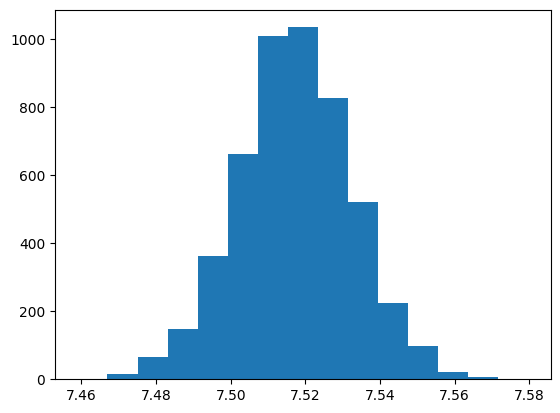

In [156]:
coffee_boot_distn = bootstrap_distn

plt.hist(bootstrap_distn, bins=15)
plt.show()

In [160]:
display(
np.mean(coffee_boot_distn)
)

display(
np.mean(coffee_boot_distn) - np.std(coffee_boot_distn, ddof=1)
)

display(
np.mean(coffee_boot_distn) + np.std(coffee_boot_distn, ddof=1)
)

display(
np.quantile(coffee_boot_distn, 0.025)
)

display(
np.quantile(coffee_boot_distn, 0.975)
)

7.51715324

7.501800498237099

7.532505981762901

7.486559500000001

7.547841

In [ ]:
from scipy.stats import norm
norm.ppf(quantile, loc=0, scale=1)

nan

In [163]:
point_estimate = np.mean(coffee_boot_distn)

std_error = np.std(coffee_boot_distn, ddof=1)

from scipy.stats import norm
lower = norm.ppf(0.025, loc=point_estimate, scale=std_error)
upper = norm.ppf(0.975, loc=point_estimate, scale=std_error)
print((lower, upper))

(7.48706241908077, 7.54724406091923)


Calculating confidence intervals
You have learned about two methods for calculating confidence intervals: the quantile method and the standard error method. The standard error method involves using the inverse cumulative distribution function (inverse CDF) of the normal distribution to calculate confidence intervals. In this exercise, you'll perform these two methods on the Spotify data.

spotify_population, spotify_sample, and bootstrap_distribution are available; pandas and numpy are loaded with their usual aliases, and norm has been loaded from scipy.stats.

In [166]:
# Generate a 95% confidence interval using the quantile method
lower_quant = np.quantile(coffee_boot_distn, 0.025)
upper_quant = np.quantile(coffee_boot_distn, 0.975)

# Print quantile method confidence interval
print((lower_quant, upper_quant))

(7.486559500000001, 7.547841)


In [167]:
# Find the mean and std dev of the bootstrap distribution
point_estimate = np.mean(coffee_boot_distn)
standard_error = np.std(coffee_boot_distn, ddof=1)

# Find the lower limit of the confidence interval
lower_se = norm.ppf(0.025, loc=point_estimate, scale=standard_error)

# Find the upper limit of the confidence interval
upper_se = norm.ppf(0.975, loc=point_estimate, scale=standard_error)

# Print standard error method confidence interval
print((lower_se, upper_se))

(7.48706241908077, 7.54724406091923)


In [168]:
print('Perrenque!')

Perrenque!
